## Climatologies from ERA-5 and E-OBS data

This notebook contains production of plots displaying several types of climatologies as given by E-OBS and ERA-5 data, for warsaw and Madrid. This notebook only loads formatted data, which is done as in the scrpts ``climatologies_eobs_era5.py`` and ``gridwise_difference_eobs_era5.py``. The latter takes raw E-OBS and ERA-5 files, selects the gridpoints corresponding to Warsaw and Madrid, and performs a regridding so that the two sets of data are comparable. In ``climatologies_eobs_era5.py``, different climatologies are calculated. 

In [1]:
# necessary imports

import os  # for interaction with operating system
import xarray as xr  # for reading and handling netcdf files
import matplotlib.pyplot as plt  # plotting library
import cartopy.crs as ccrs  # for correct mapping of gridpoints
import calendar  # for nice display of month name

In [2]:
from scripts.local_paths import eobsPath, era5Path

Define a nice color palette. 

In [3]:
# nice color palette
shades_of_blue = ('aquamarine', 'turquoise', 'lightseagreen', 'teal', 'cadetblue',
                  'powderblue', 'deepskyblue', 'lightskyblue', 'steelblue', 'dodgerblue',
                  'cornflowerblue', 'royalblue', 'mediumblue', 'mediumslateblue')

### Monthly averages of Daily maximum temperature

We load sets of regridded E-OBS and ERA-5 data, for the same selections around Warsaw and Madrid. These contain the montly averages of the daily maximum temperature, for each available gridpoint for the two cities. 

In [4]:
ds_monavg_eobs_madrid = xr.open_dataset(eobsPath("monavg_regrid_eobs_Madrid.nc"))
ds_monavg_era5_madrid = xr.open_dataset(era5Path("monavg_regrid_era5_Madrid.nc"))
ds_monavg_eobs_warsaw = xr.open_dataset(eobsPath("monavg_regrid_eobs_Warsaw.nc"))
ds_monavg_era5_warsaw = xr.open_dataset(era5Path("monavg_regrid_era5_Warsaw.nc"))

We plot the data as time series for each of the cities. We display one line for each gridpoint, to get an impression of the variability within the cities while still get a good impression of the development over time. 

finished making plot
Finished saving


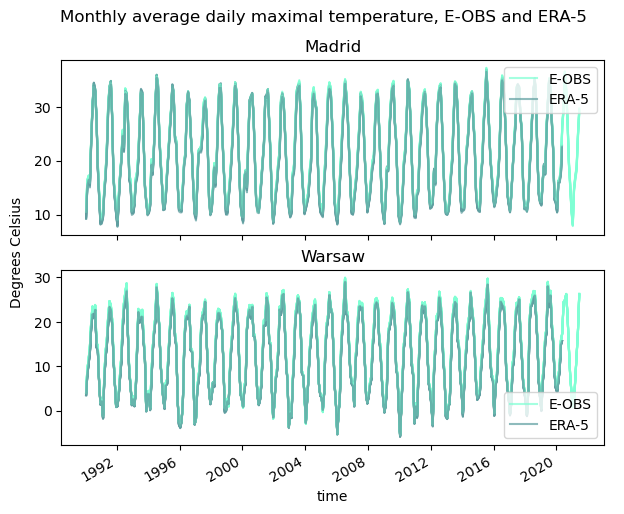

In [5]:
# initiate figure with two subplots, one for each city
fig, (ax_madrid, ax_warsaw) = plt.subplots(nrows = 2, ncols = 1, sharex = True, figsize = (7,5))

# iterate through gridpoints of Madrid, plot the tx time series for each
for lon in range(ds_monavg_eobs_madrid.dims.get('longitude')):
    for lat in range(ds_monavg_eobs_madrid.dims.get('latitude')):
        ds_monavg_eobs_madrid.isel(longitude = lon, latitude = lat)["tx"].plot(ax = ax_madrid, color = shades_of_blue[0], alpha = 0.7, label = ("E-OBS" if lon == 0 and lat == 0 else "_nolegend_"))
        ds_monavg_era5_madrid.isel(longitude = lon, latitude = lat)["tx"].plot(ax= ax_madrid, color = shades_of_blue[4], alpha = 0.7, label = ("ERA-5" if lon == 0 and lat == 0 else "_nolegend_"))

# iterate through gridpoints of Warsaw, plot the tx time series for each
for lon in range(ds_monavg_eobs_warsaw.dims.get('longitude')):
    for lat in range(ds_monavg_eobs_warsaw.dims.get('latitude')):
        ds_monavg_eobs_warsaw.isel(longitude = lon, latitude = lat)["tx"].plot(
            ax = ax_warsaw, color = shades_of_blue[0], alpha = 0.7, 
            label = ("E-OBS" if lon == 0 and lat == 0 else "_nolegend_")
        )
        ds_monavg_era5_warsaw.isel(longitude = lon, latitude = lat)["tx"].plot(
            ax = ax_warsaw, color = shades_of_blue[4], alpha = 0.7,
            label = ("ERA-5" if lon == 0 and lat == 0 else "_nolegend_")
        )

# format axes and title for Madrid plot
ax_madrid.set_title("Madrid")
ax_madrid.set_ylabel("")
ax_madrid.set_xlabel("")
ax_madrid.legend()

# format axes and title for Warsaw plot, keep years on y-axis
ax_warsaw.set_title("Warsaw")
ax_warsaw.set_ylabel("")
ax_warsaw.legend()

# add framing axis for common y-label
fig.add_subplot(111, frame_on = False)
plt.tick_params(labelcolor="none", bottom = False, left = False)
plt.ylabel("Degrees Celsius")

plt.suptitle("Monthly average daily maximal temperature, E-OBS and ERA-5")

print("finished making plot")

plt.savefig("data/monavg_era5_eobs.png")

print("Finished saving")

plt.show()

### Daily anomalies from montly average of maximum temperature

We begin by loading formatted E-OBS and ERA-5 data for Madrid and Warsaw. The parameter ``tx`` in question is the daily difference (anomaly) between the maximum temperature of a specific day and the montly average of the daily maximum temperature for the corresponding month. The formatting is done as in ``climatologies_eobs_era5.py``. 

In [6]:
ds_anomalies_eobs_madrid = xr.open_dataset(eobsPath("anomalies_mon_regrid_eobs_Madrid.nc"))
ds_anomalies_era5_madrid = xr.open_dataset(era5Path("anomalies_mon_regrid_era5_Madrid.nc"))
ds_anomalies_eobs_warsaw = xr.open_dataset(eobsPath("anomalies_mon_regrid_eobs_Warsaw.nc"))
ds_anomalies_era5_warsaw = xr.open_dataset(era5Path("anomalies_mon_regrid_era5_Warsaw.nc"))

As for the plot of the montly averages, we plot the anomalies for ERA-5 and E-OBS as timeseries for each gridpoint, for each city. 

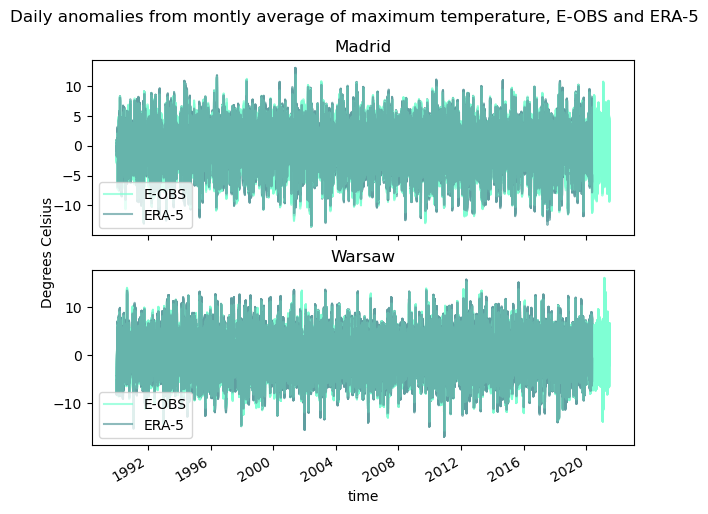

In [7]:
fig, (ax_madrid, ax_warsaw) = plt.subplots(nrows = 2, ncols = 1, sharex = True, figsize = (7,5))

for lon in range(ds_anomalies_eobs_madrid.dims.get('longitude')):
    for lat in range(ds_anomalies_eobs_madrid.dims.get('latitude')):
        ds_anomalies_eobs_madrid.isel(longitude = lon, latitude = lat)["tx"].plot(ax = ax_madrid, color = shades_of_blue[0], alpha = 0.7, label = ("E-OBS" if lon == 0 and lat == 0 else "_nolegend_"))
        ds_anomalies_era5_madrid.isel(longitude = lon, latitude = lat)["tx"].plot(ax= ax_madrid, color = shades_of_blue[4], alpha = 0.7, label = ("ERA-5" if lon == 0 and lat == 0 else "_nolegend_"))

for lon in range(ds_anomalies_eobs_warsaw.dims.get('longitude')):
    for lat in range(ds_anomalies_eobs_warsaw.dims.get('latitude')):
        ds_anomalies_eobs_warsaw.isel(longitude = lon, latitude = lat)["tx"].plot(
            ax = ax_warsaw, color = shades_of_blue[0], alpha = 0.7,
            label = ("E-OBS" if lon == 0 and lat == 0 else "_nolegend_")
        )
        ds_anomalies_era5_warsaw.isel(longitude = lon, latitude = lat)["tx"].plot(
            ax = ax_warsaw, color = shades_of_blue[4], alpha = 0.7,
            label = ("ERA-5" if lon == 0 and lat == 0 else "_nolegend_")
        )

ax_madrid.set_title("Madrid")
ax_madrid.set_ylabel("")
ax_madrid.set_xlabel("")
ax_madrid.legend()

ax_warsaw.set_title("Warsaw")
ax_warsaw.set_ylabel("")
ax_warsaw.legend()

# add framing axis for common y-label
fig.add_subplot(111, frame_on = False)
plt.tick_params(labelcolor="none", bottom = False, left = False)
plt.ylabel("Degrees Celsius")

plt.suptitle("Daily anomalies from montly average of maximum temperature, E-OBS and ERA-5")

plt.savefig("data/anomalies_era5_eobs.png")
plt.show()

### Difference in monthly averages

We load data of the difference between the montly averages of daily maximum temperatures given by the ERA-5 and the E-OBS data, for Warsaw and Madrid. The difference is calculated for each gridpoint in both cities, and the full formatting of the data is done as in ``climatologies_eobs_era5.py``. We do one piece of data formatting here, which is slicing the time series at the dates for which both ERA-5 and E-OBS contains measurements, simply to get plots with a nicer range. 

In [8]:
# load data
ds_monavg_difference_madrid = xr.open_dataset("data/monavg_difference_eobs_era5_Madrid.nc")
ds_monavg_difference_warsaw = xr.open_dataset("data/monavg_difference_eobs_era5_Warsaw.nc")

# slice for dates where you have observations for both sets of data
ds_monavg_difference_madrid = ds_monavg_difference_madrid.sel(time = slice("1990-01-01", "2020-05-15"))
ds_monavg_difference_warsaw = ds_monavg_difference_warsaw.sel(time = slice("1990-01-01", "2020-05-15"))

We begin by plotting the difference as a time series, with one line for each grid point. 

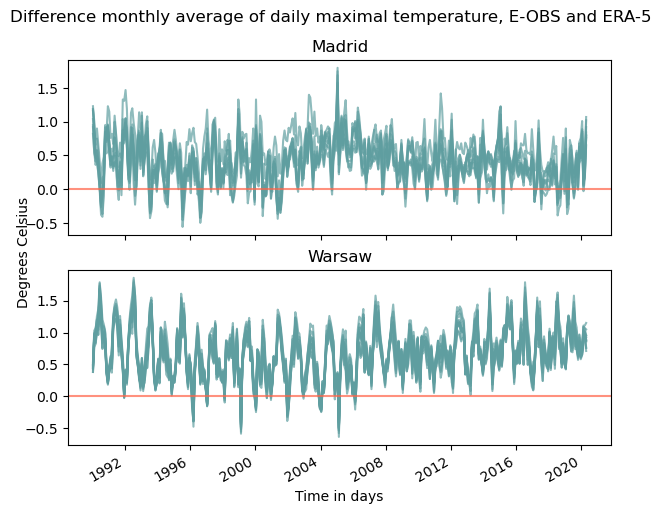

In [9]:
fig, (ax_madrid, ax_warsaw) = plt.subplots(nrows = 2, ncols = 1, sharex = True, figsize = (7,5))

for lon in range(ds_monavg_difference_madrid.dims.get('longitude')):
    for lat in range(ds_monavg_difference_madrid.dims.get('latitude')):
        ds_monavg_difference_madrid.isel(longitude = lon, latitude = lat)["tx"].plot(
            ax = ax_madrid, color = shades_of_blue[4], alpha = 0.7)

for lon in range(ds_monavg_difference_warsaw.dims.get('longitude')):
    for lat in range(ds_monavg_difference_warsaw.dims.get('latitude')):
        ds_monavg_difference_warsaw.isel(longitude = lon, latitude = lat)["tx"].plot(
            ax = ax_warsaw, color = shades_of_blue[4], alpha = 0.7)

# add horizontal line at zero difference:
ax_madrid.axhline(y=0.0, color = "tomato", alpha = 0.7)
ax_warsaw.axhline(y=0.0, color = "tomato", alpha = 0.7)

ax_madrid.set_title("Madrid")
ax_madrid.set_ylabel("")
ax_madrid.set_xlabel("")

ax_warsaw.set_title("Warsaw")
ax_warsaw.set_ylabel("")

# add framing axis for common y-label
fig.add_subplot(111, frame_on = False)
plt.tick_params(labelcolor="none", bottom = False, left = False)
plt.ylabel("Degrees Celsius")

plt.suptitle("Difference monthly average of daily maximal temperature, E-OBS and ERA-5")

plt.savefig("data/difference_monavg_eobs_era5.png")
plt.show()

We now plot the difference in gridpoints, with one figure for each year for Warsaw and Madrid, containing subplots for the difference each month. 

Folder already exists


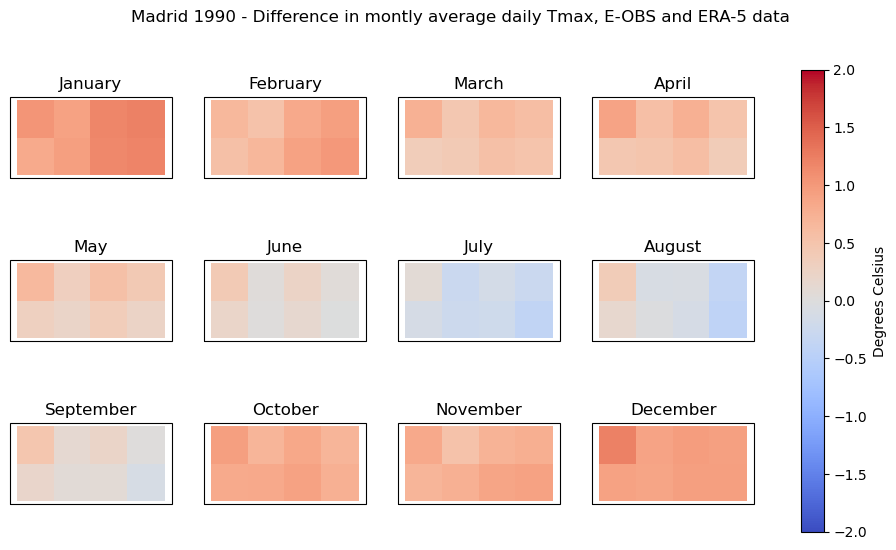

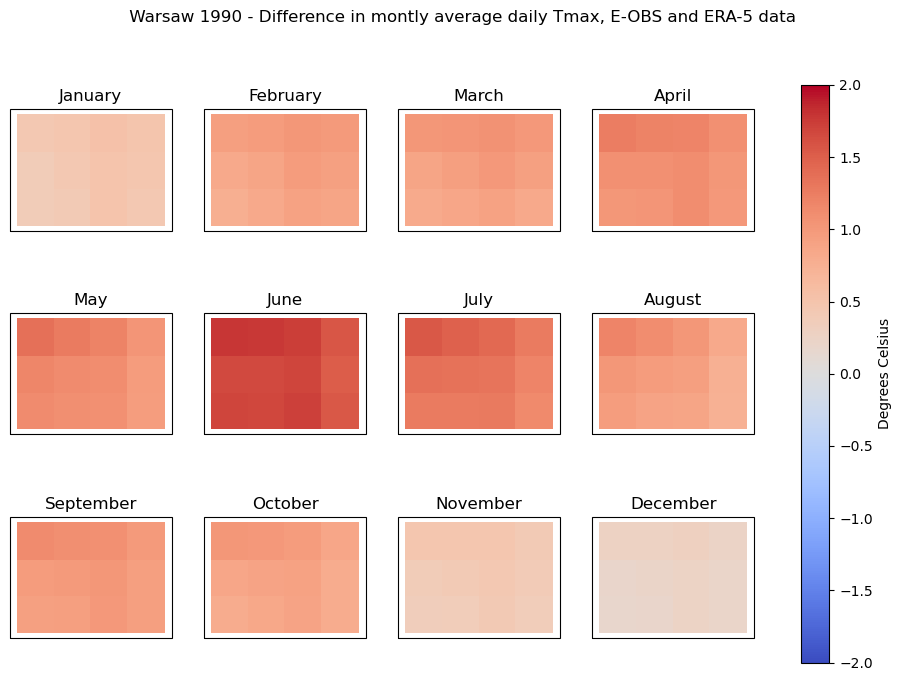

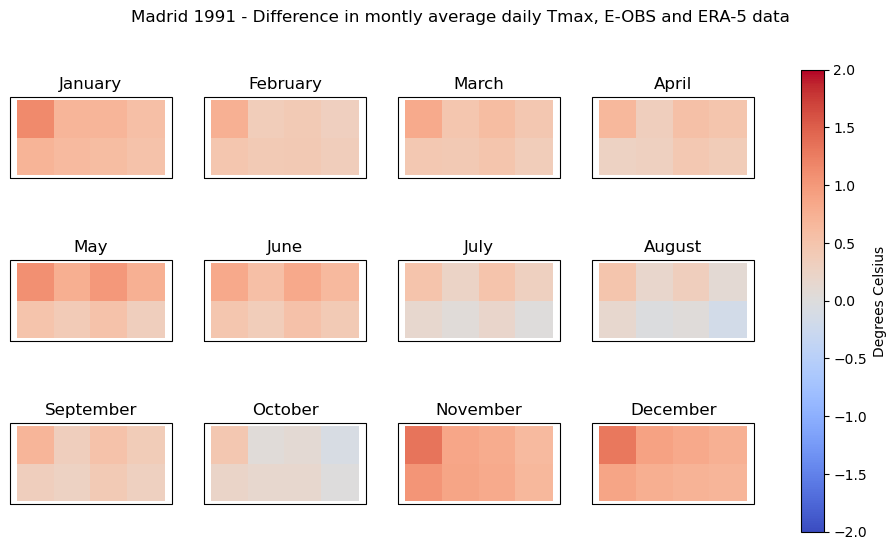

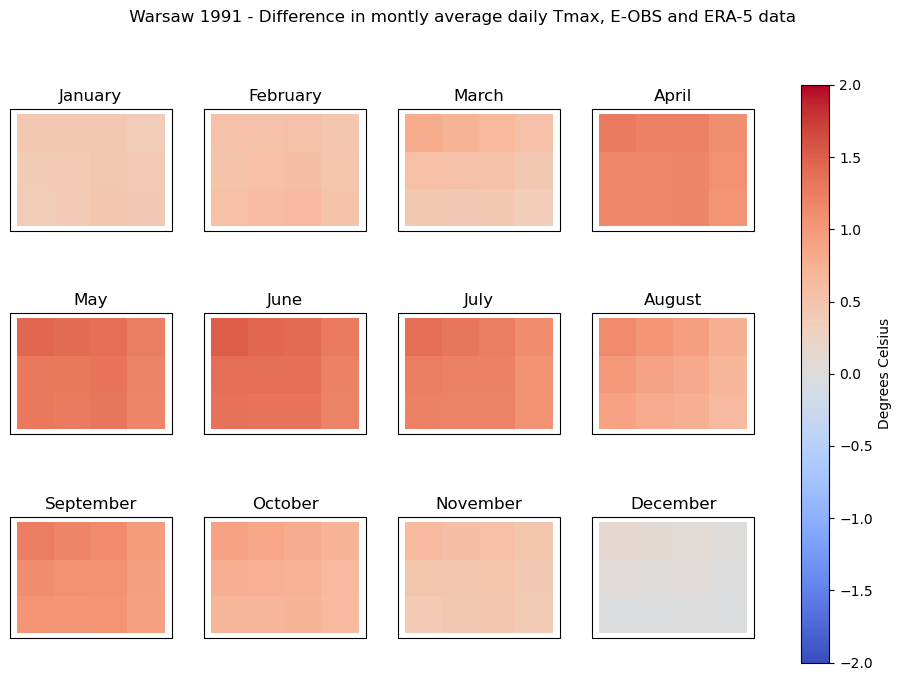

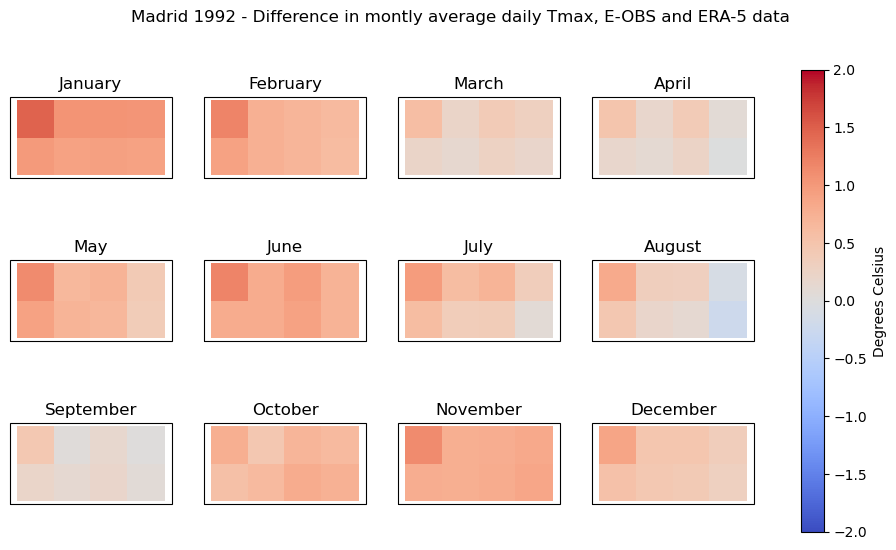

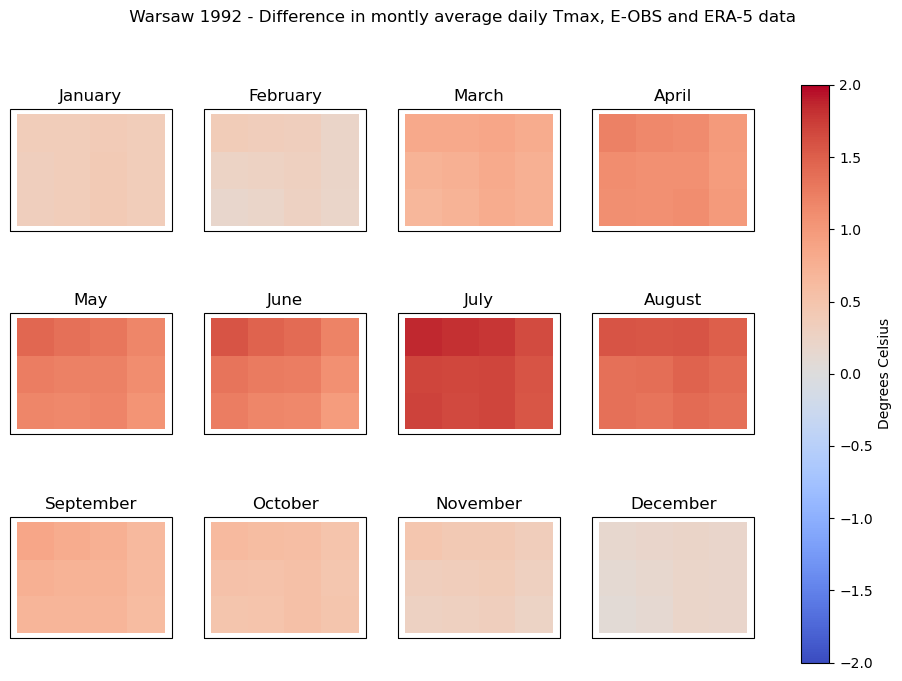

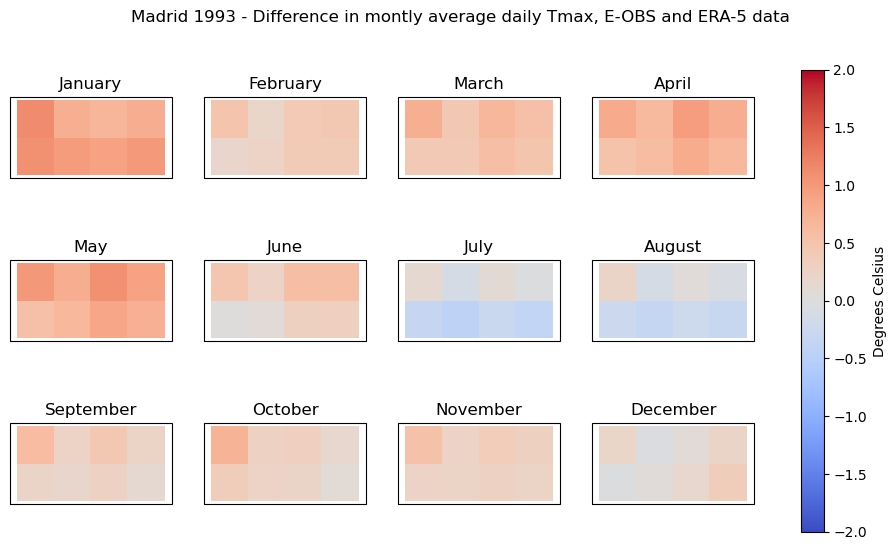

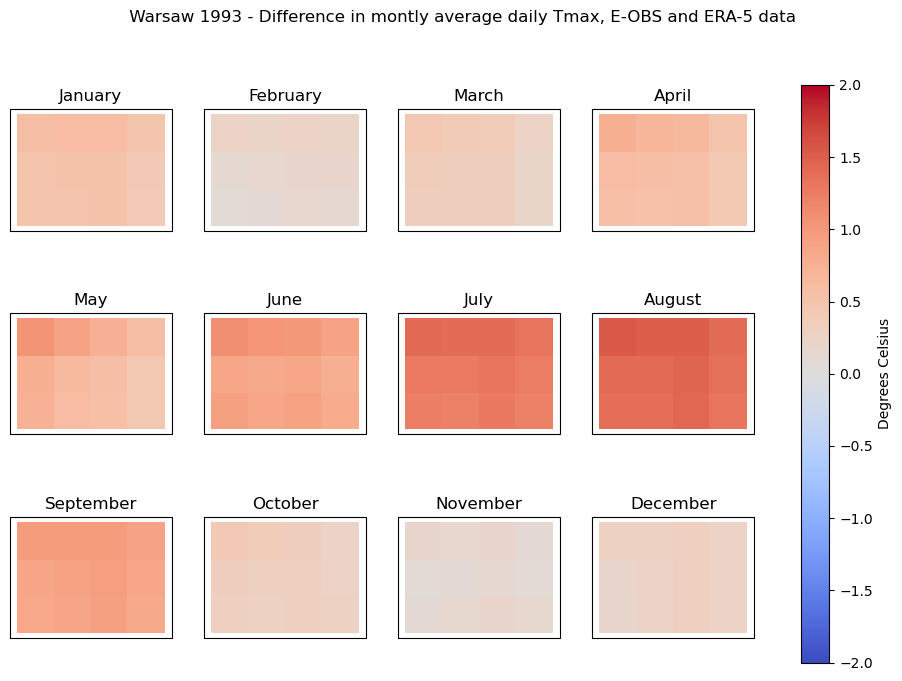

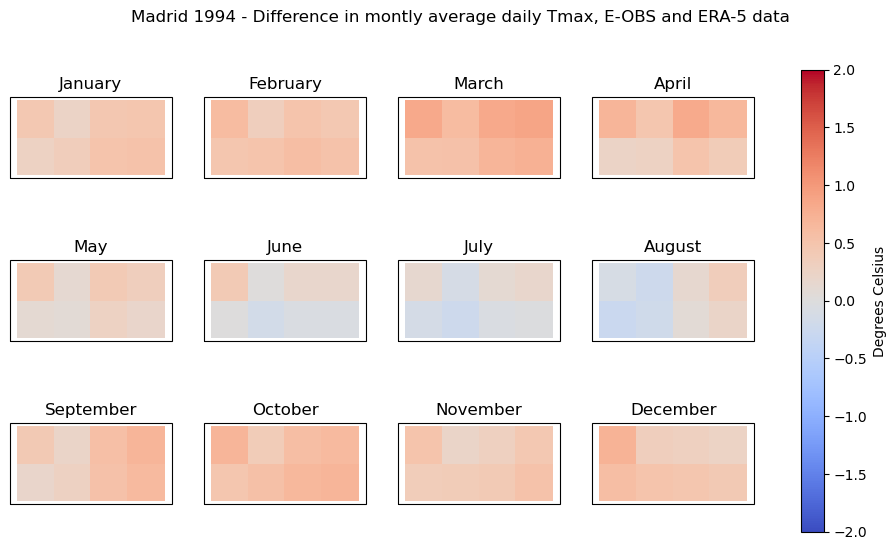

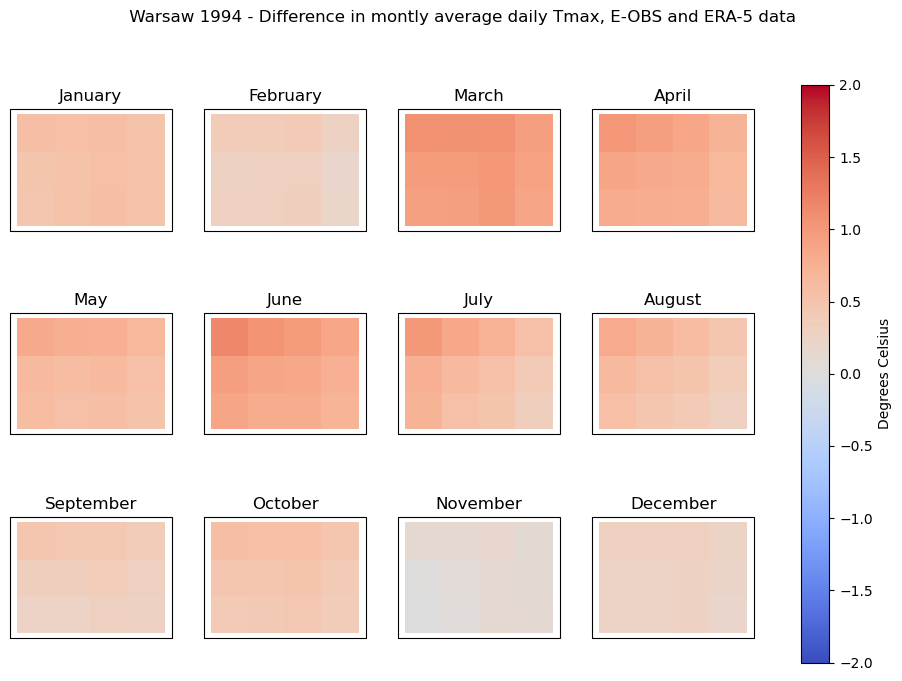

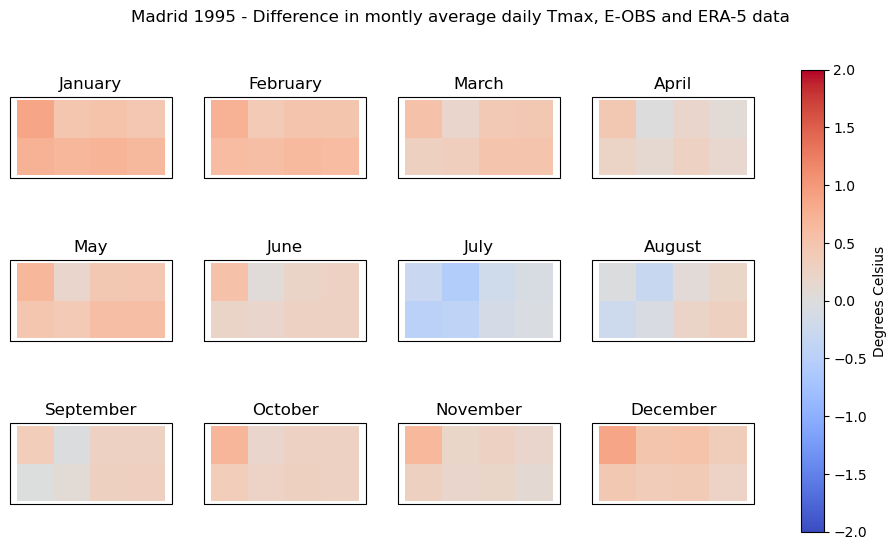

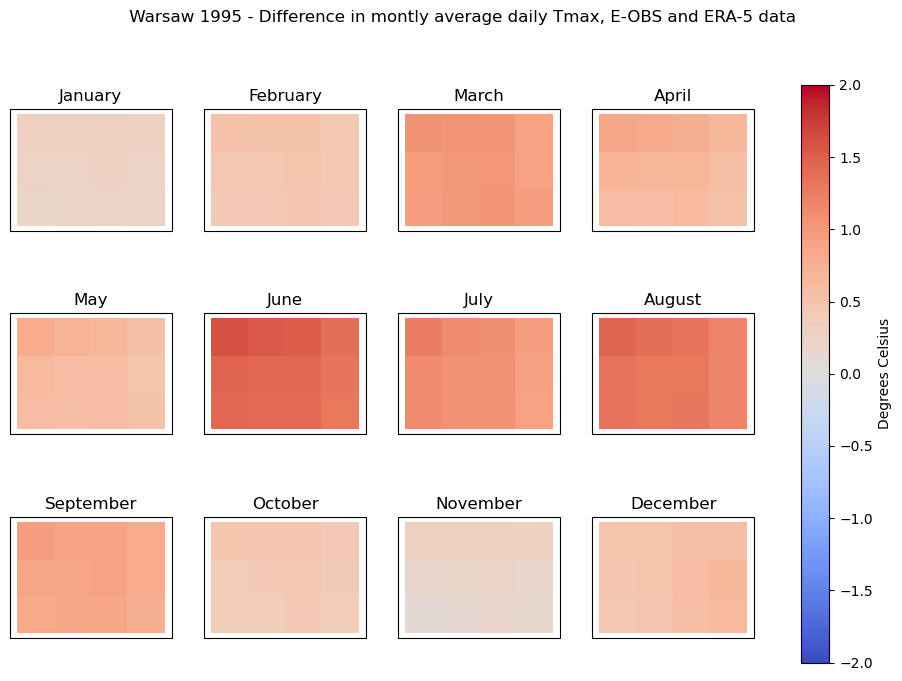

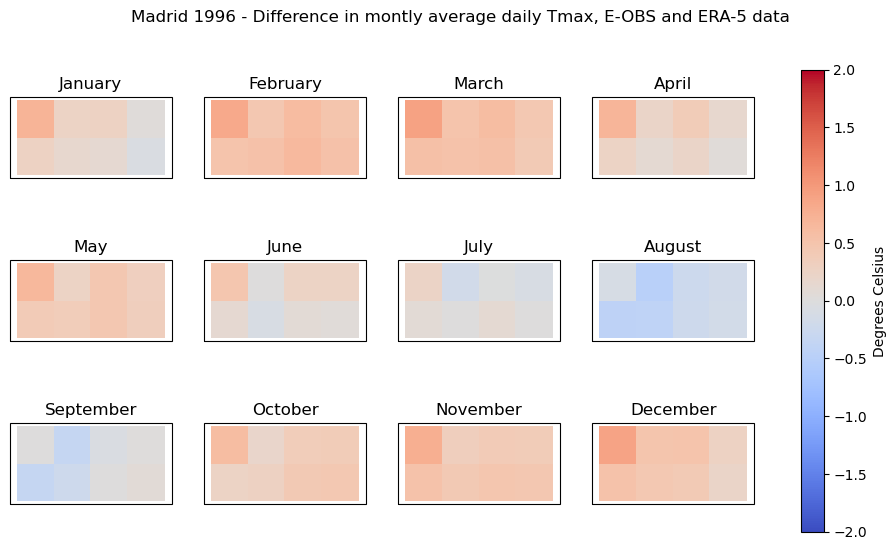

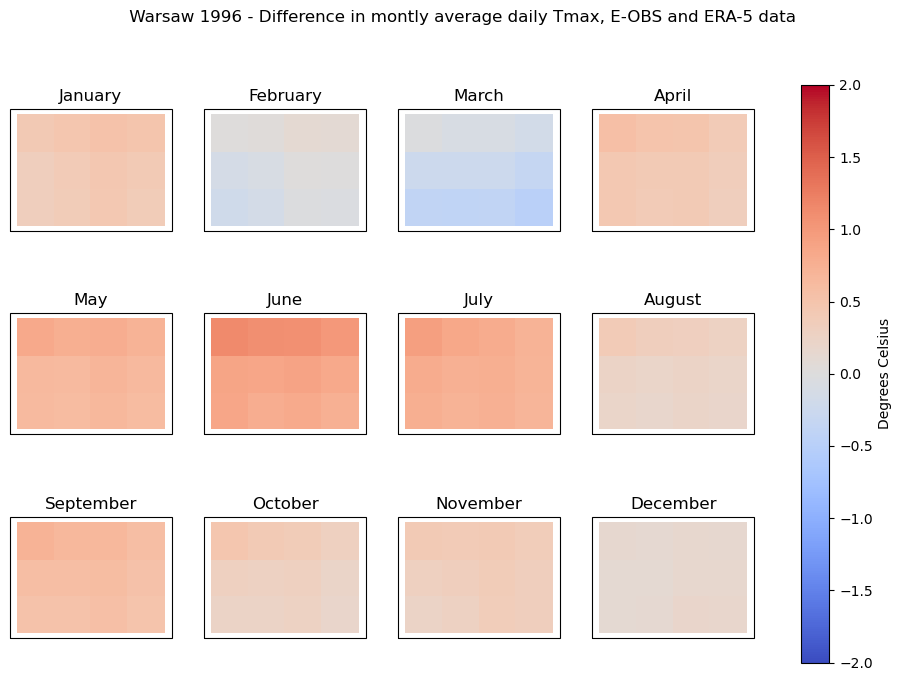

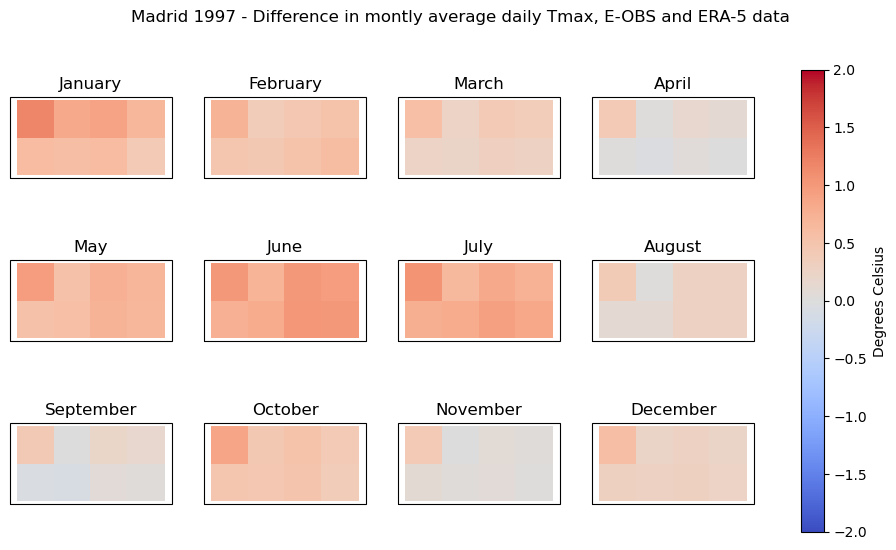

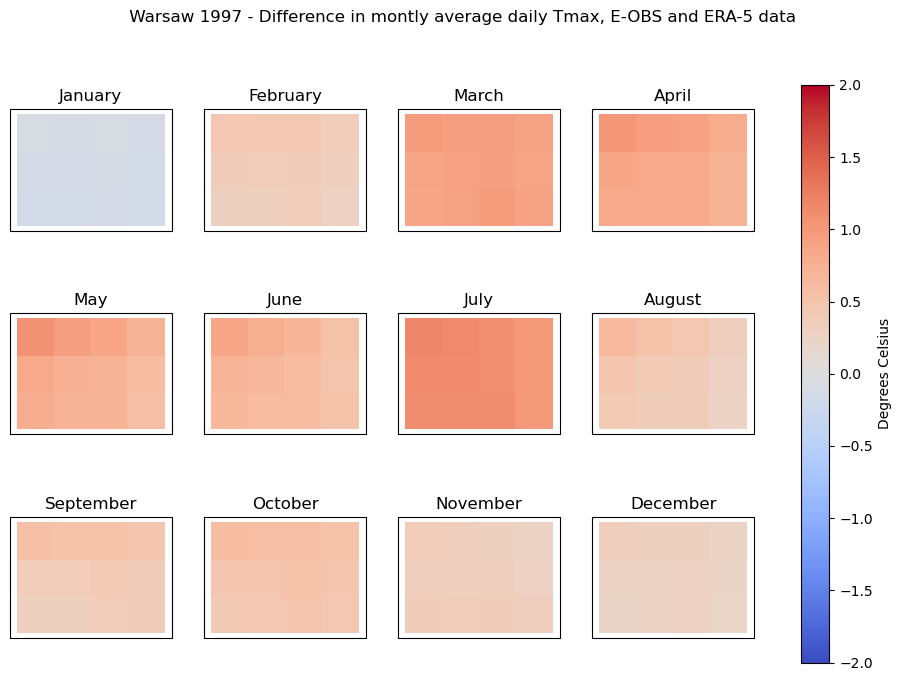

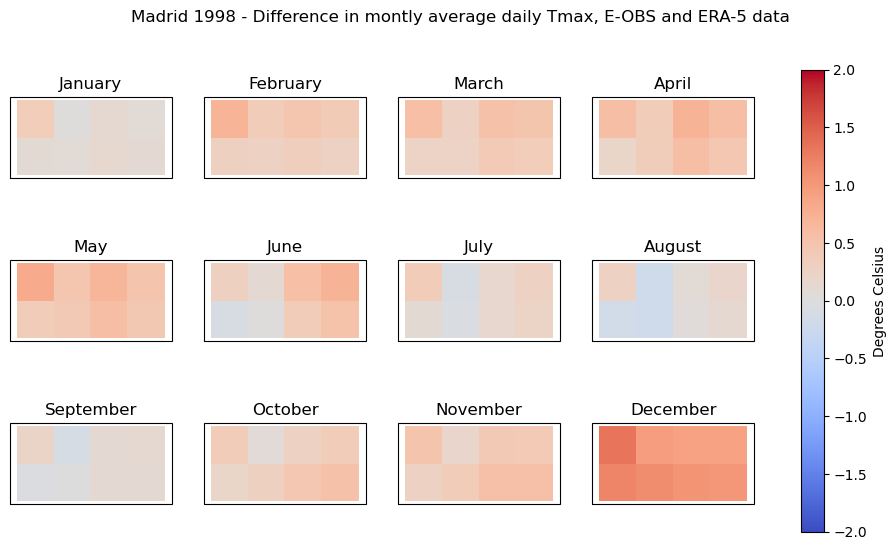

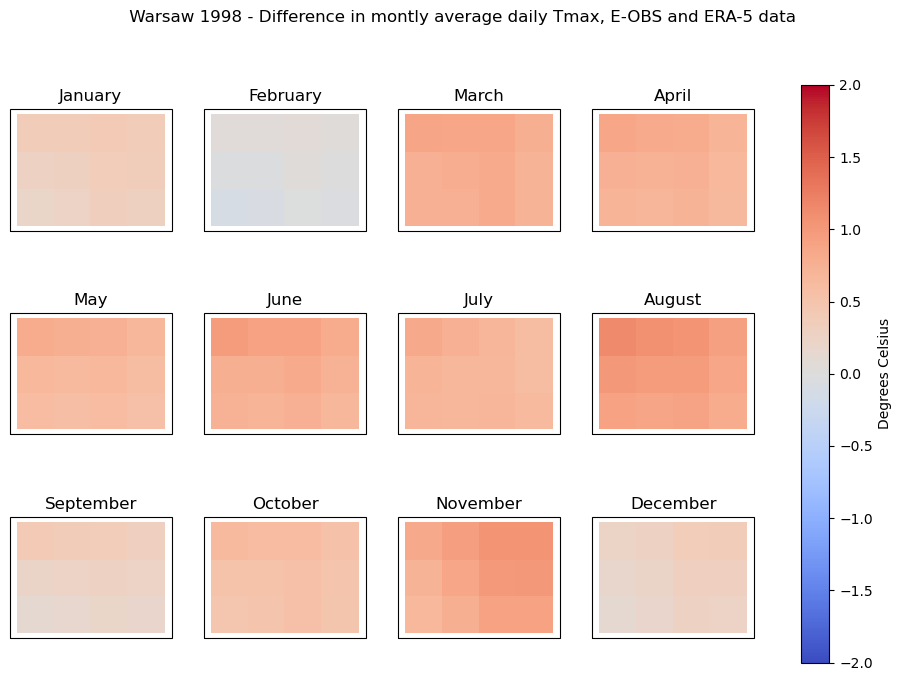

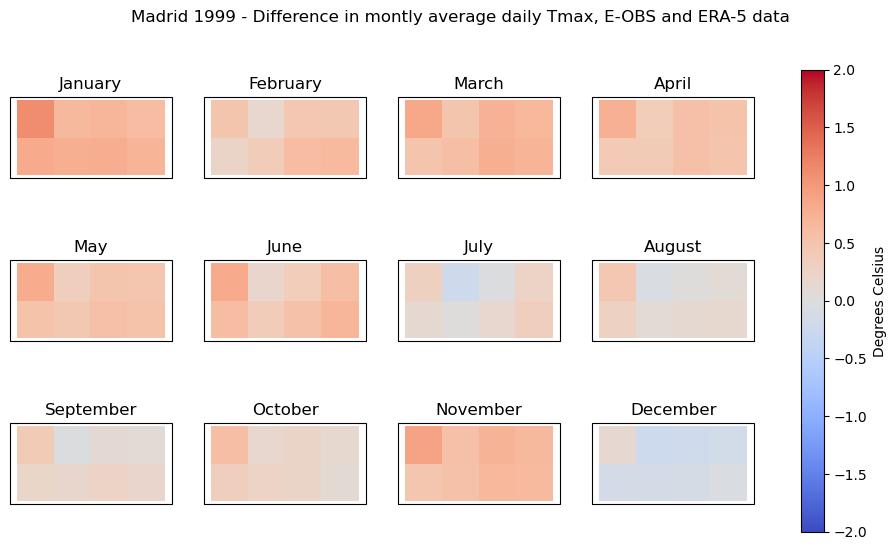

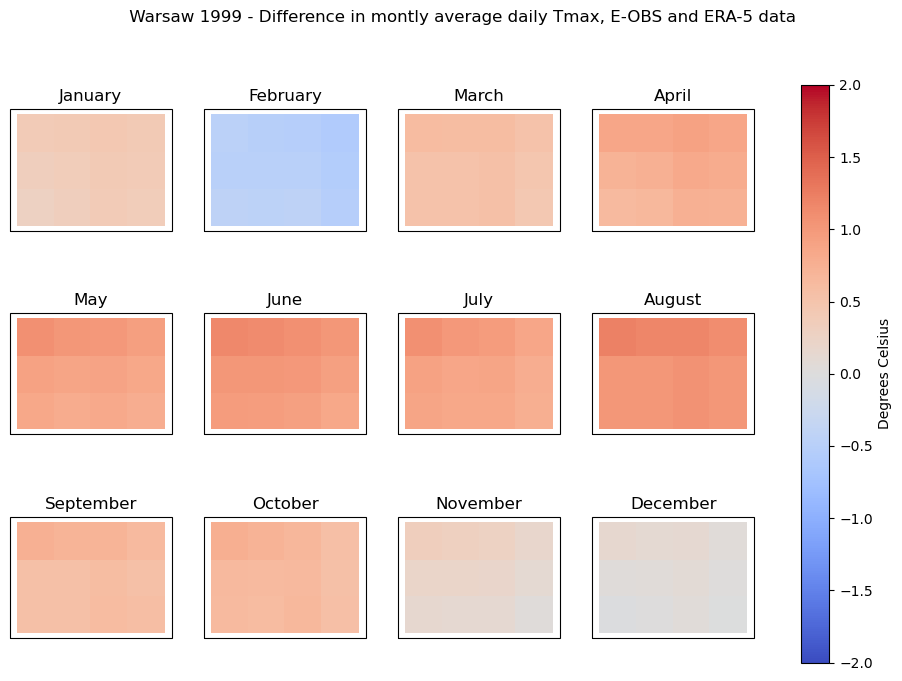

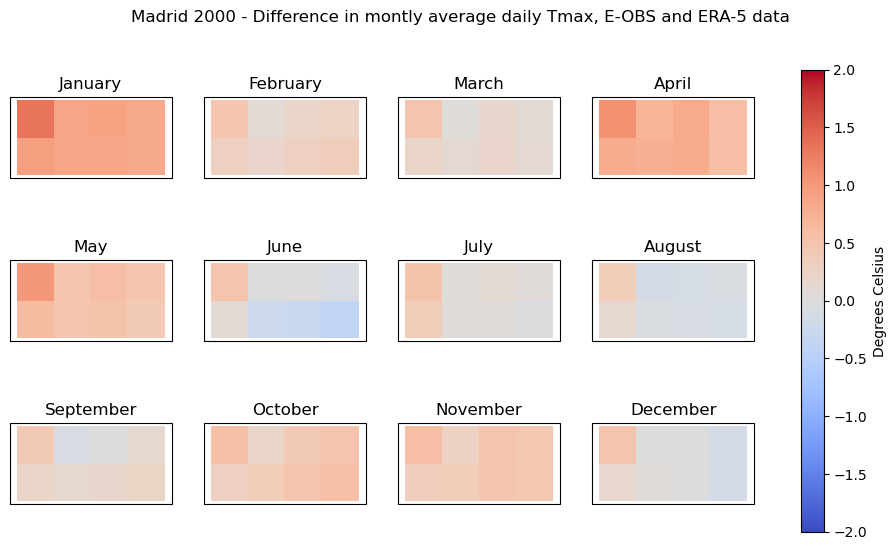

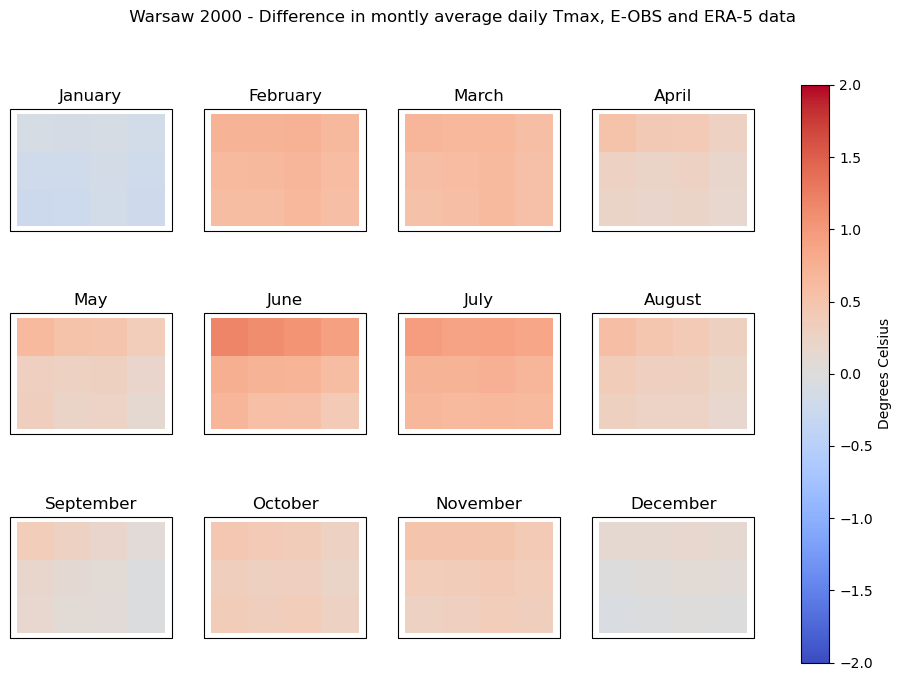

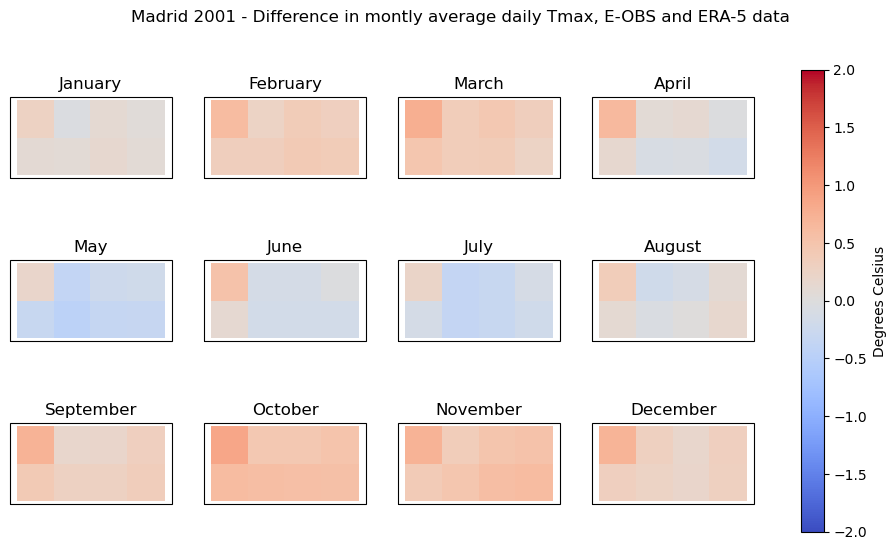

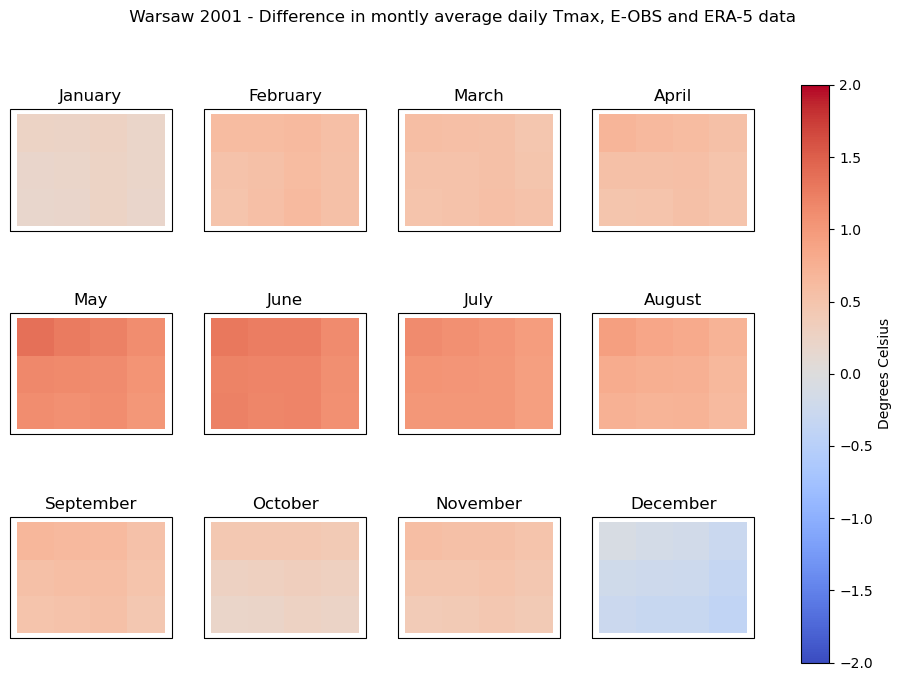

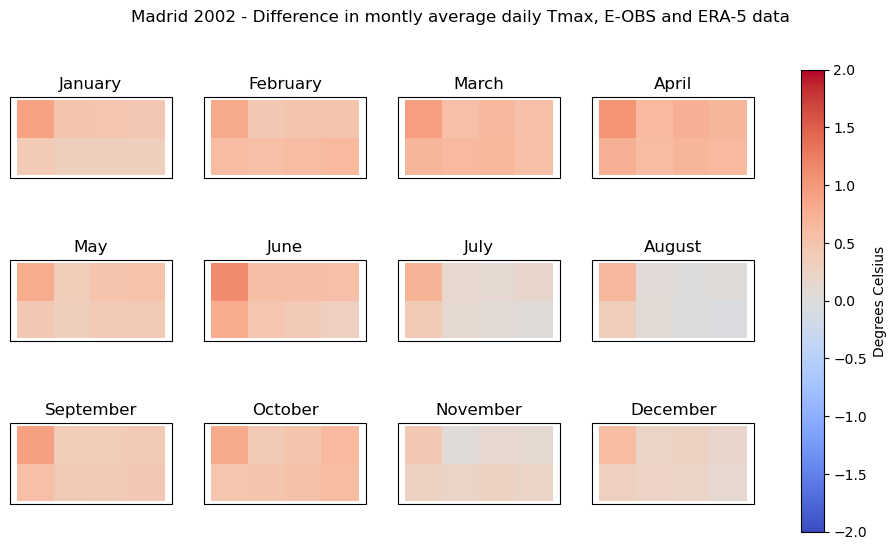

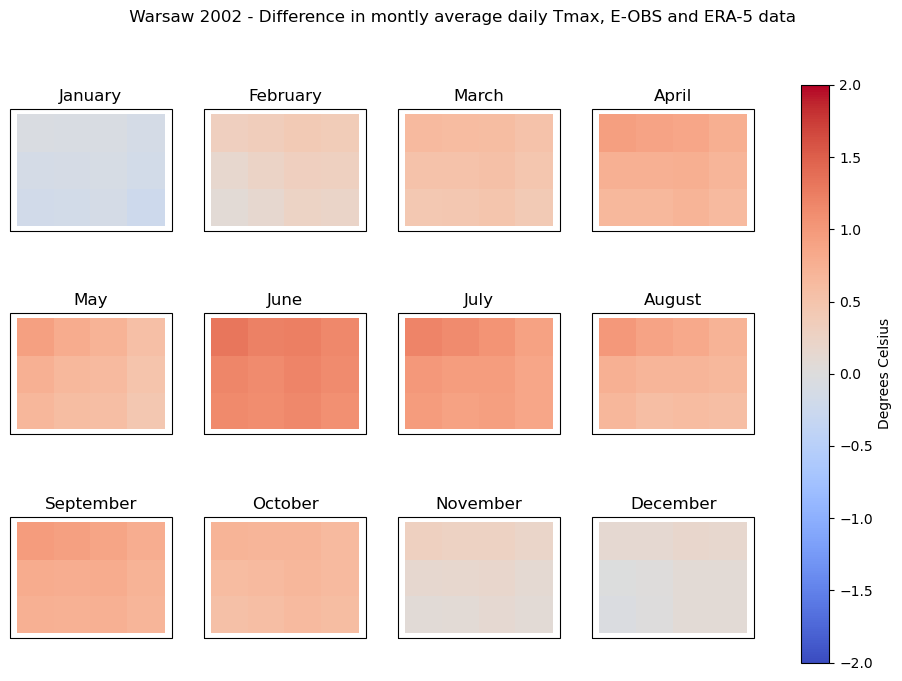

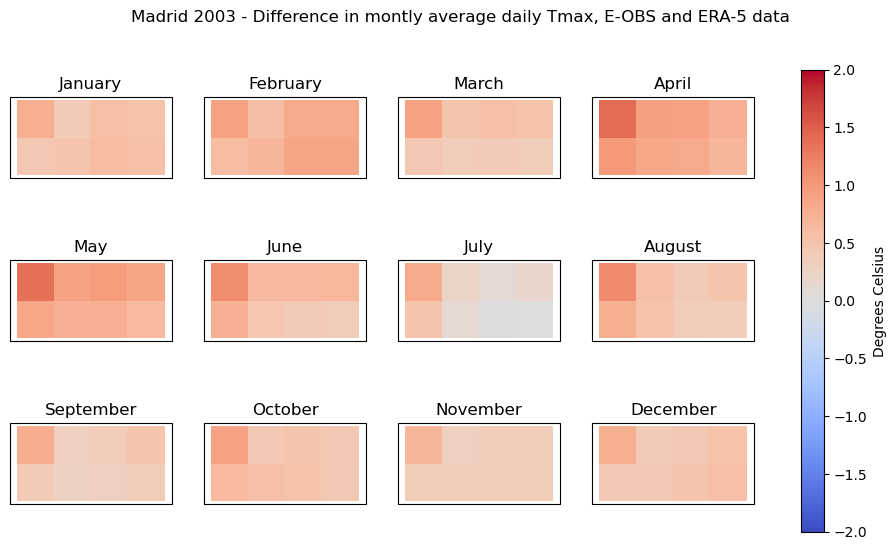

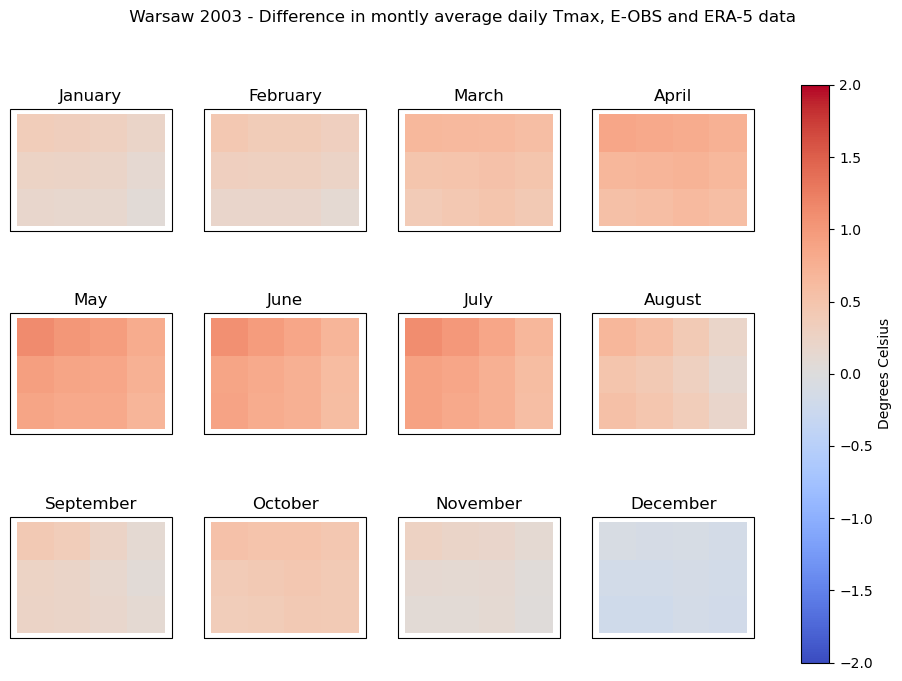

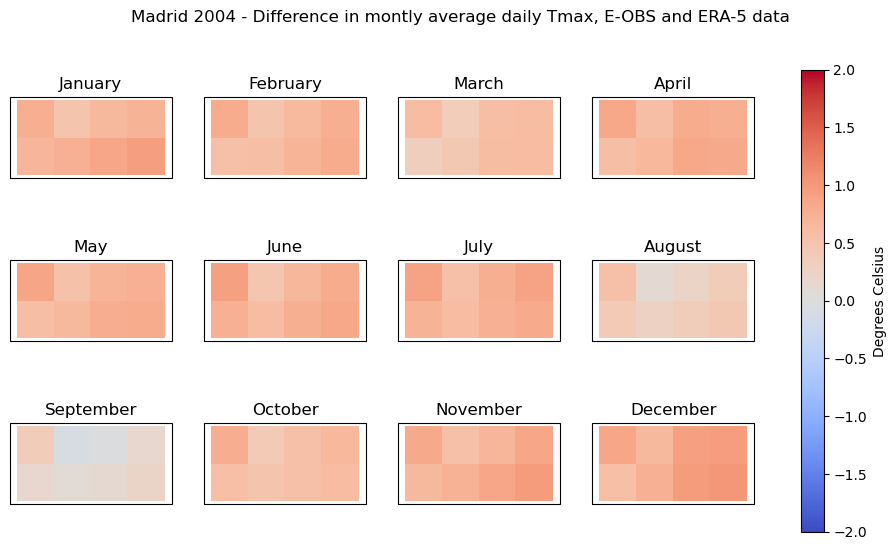

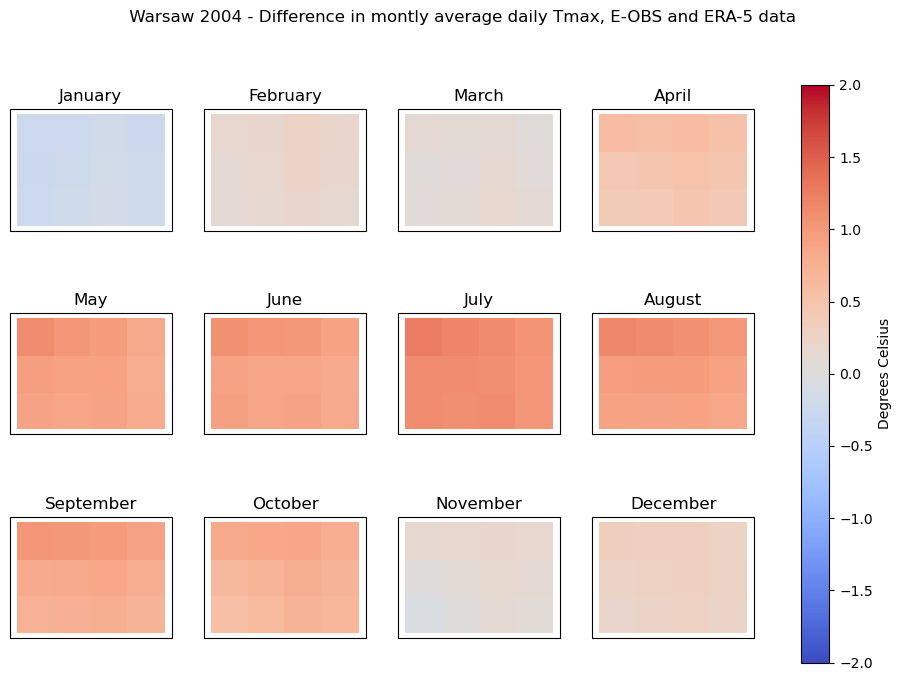

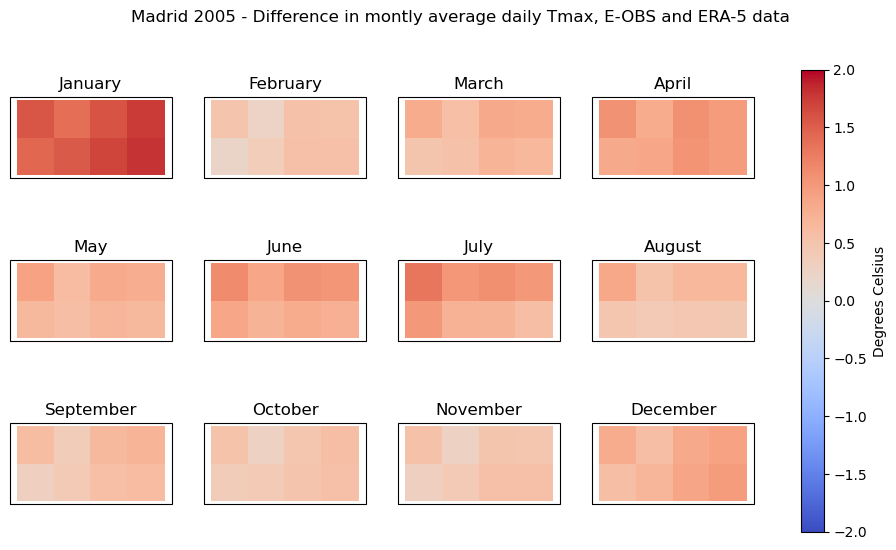

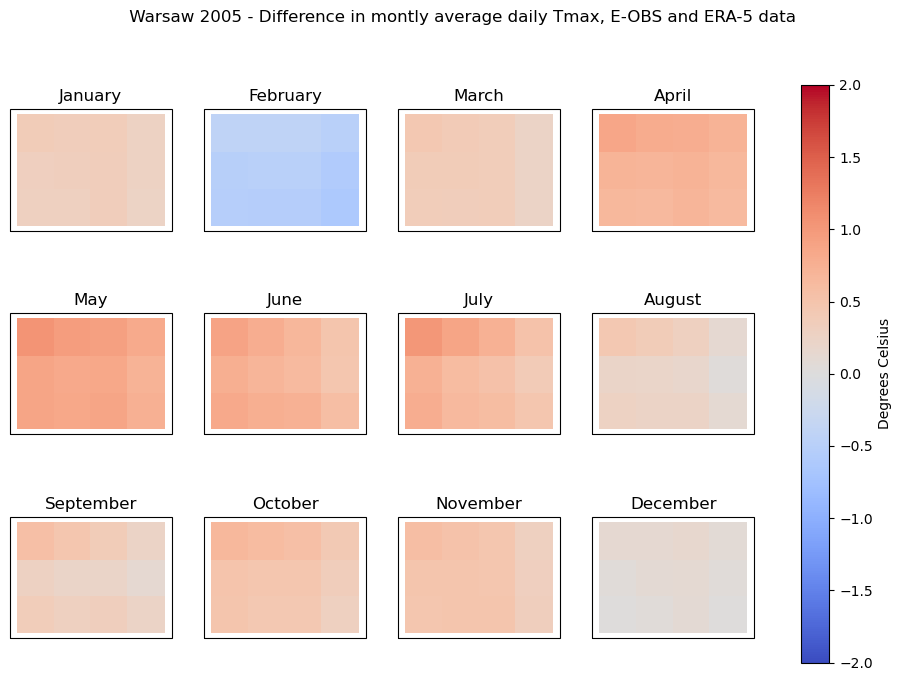

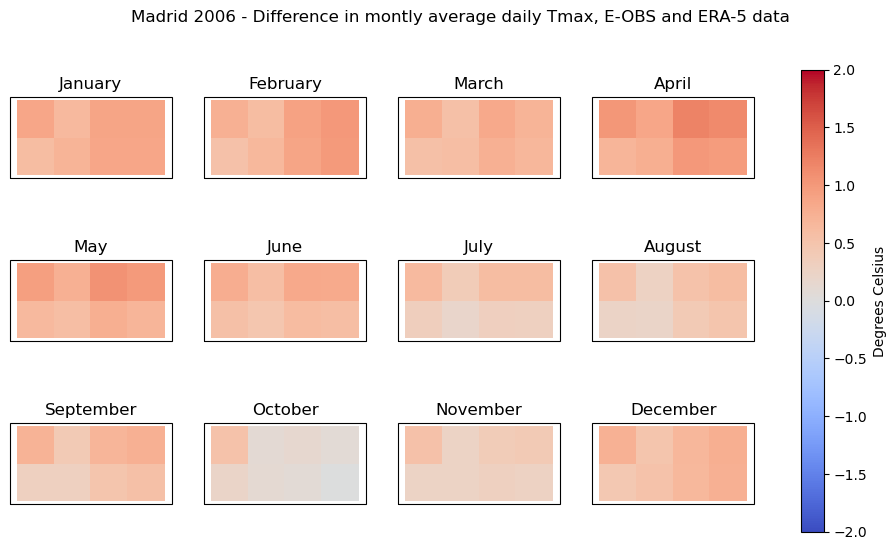

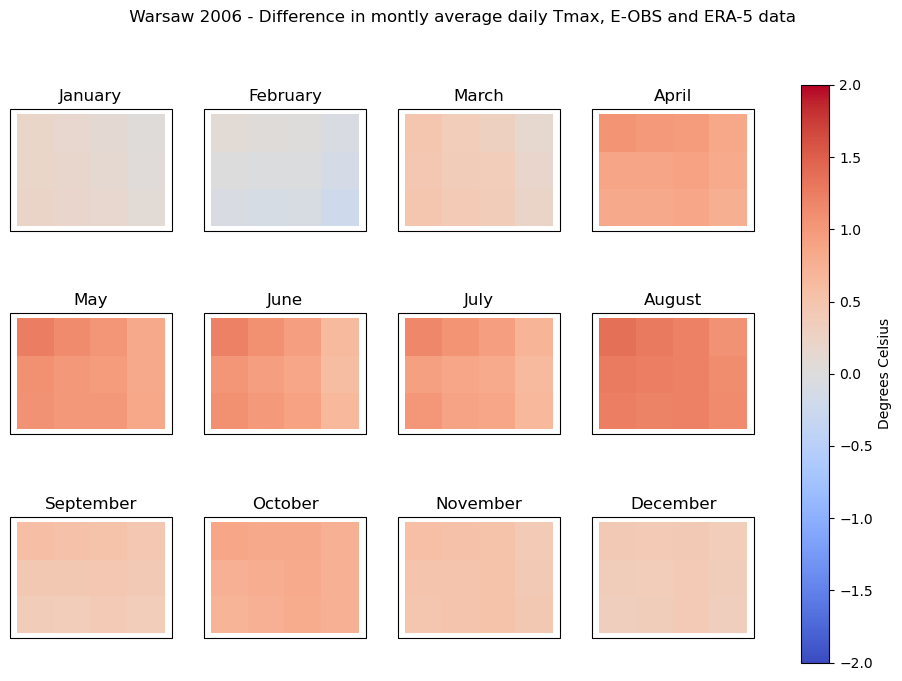

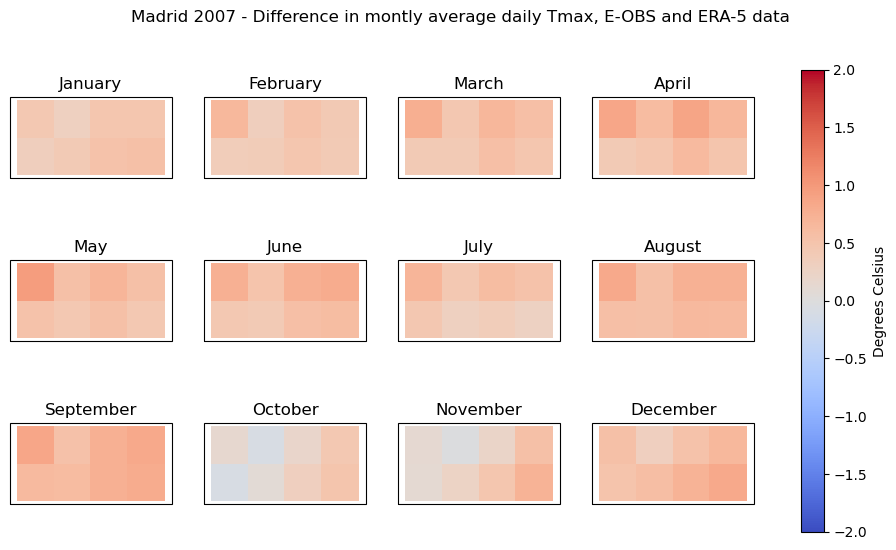

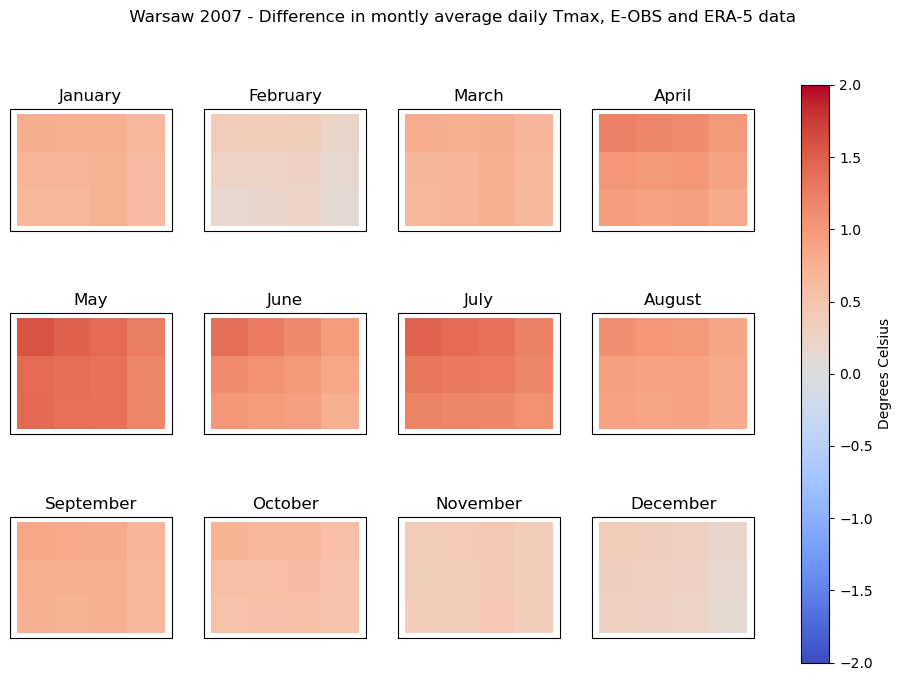

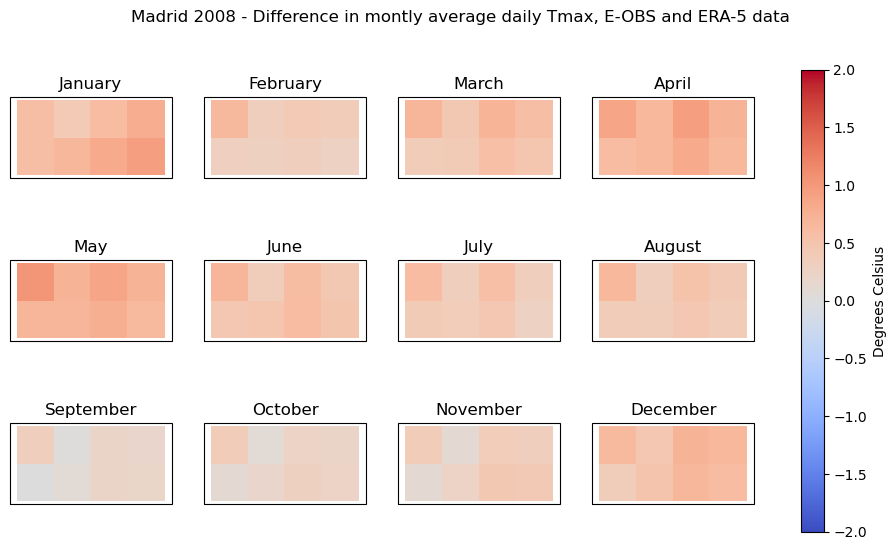

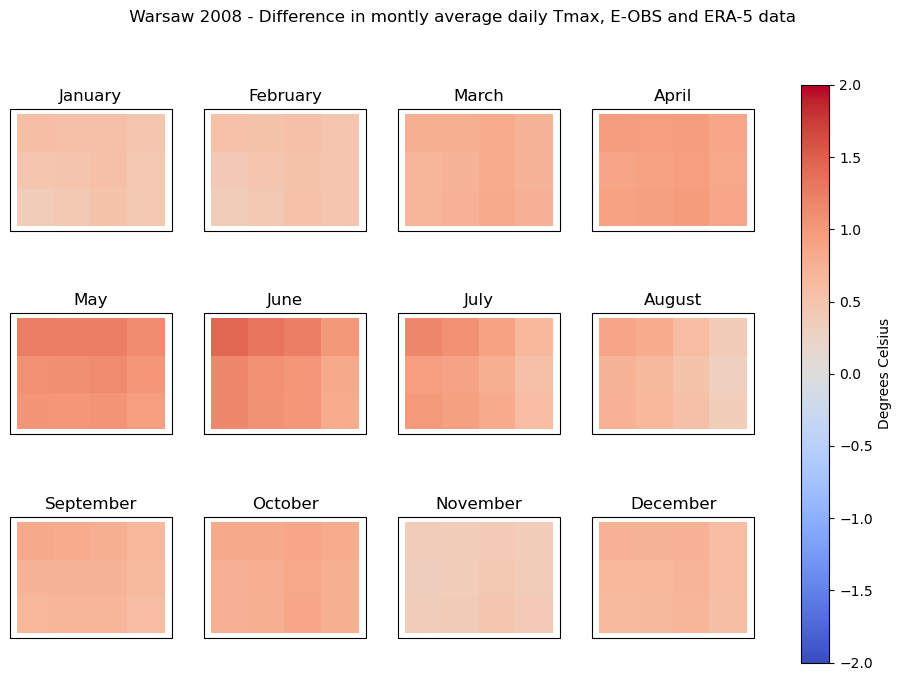

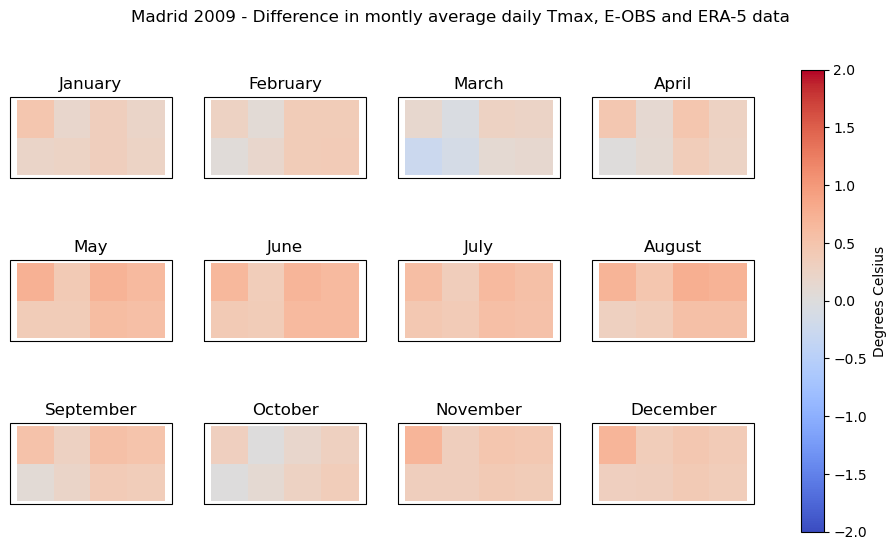

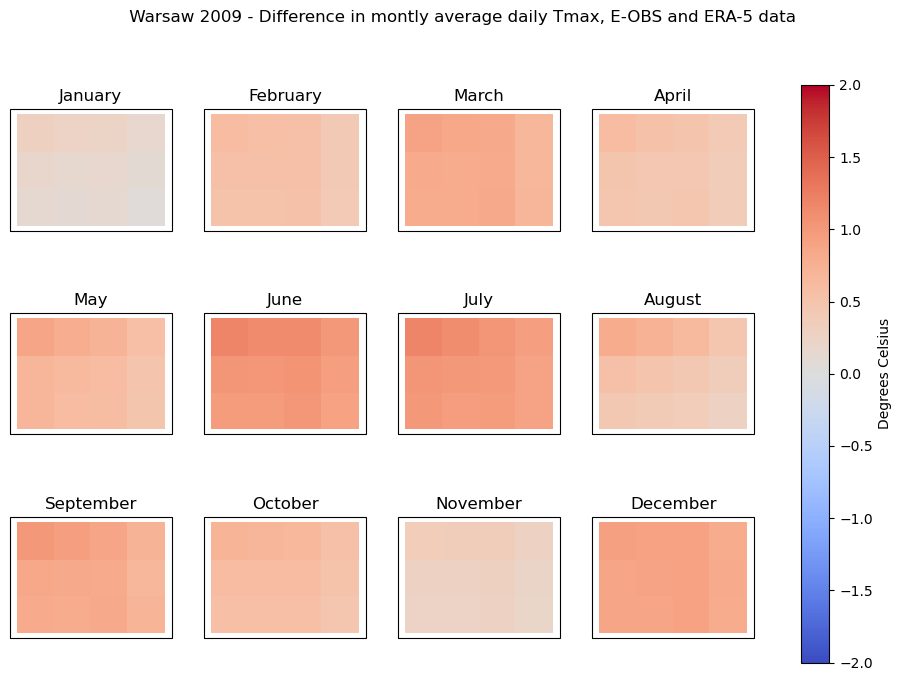

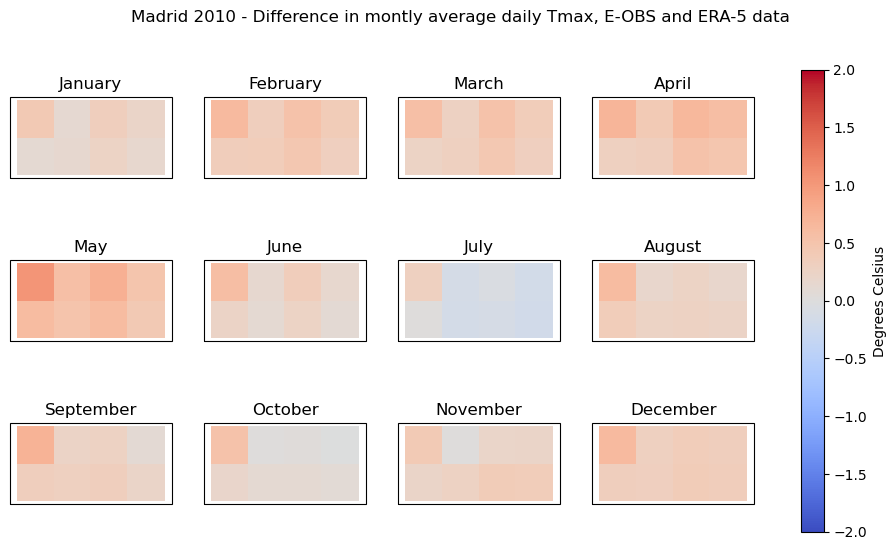

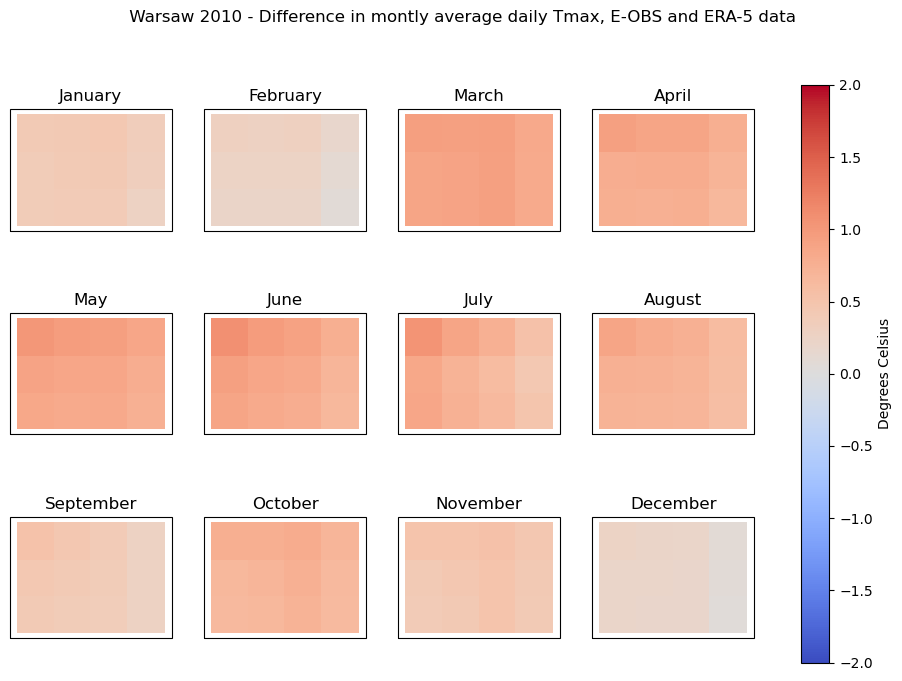

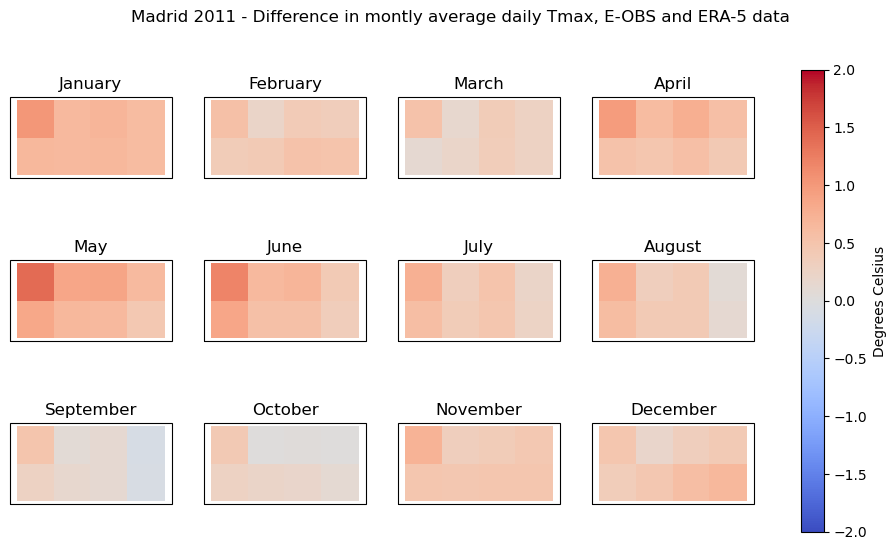

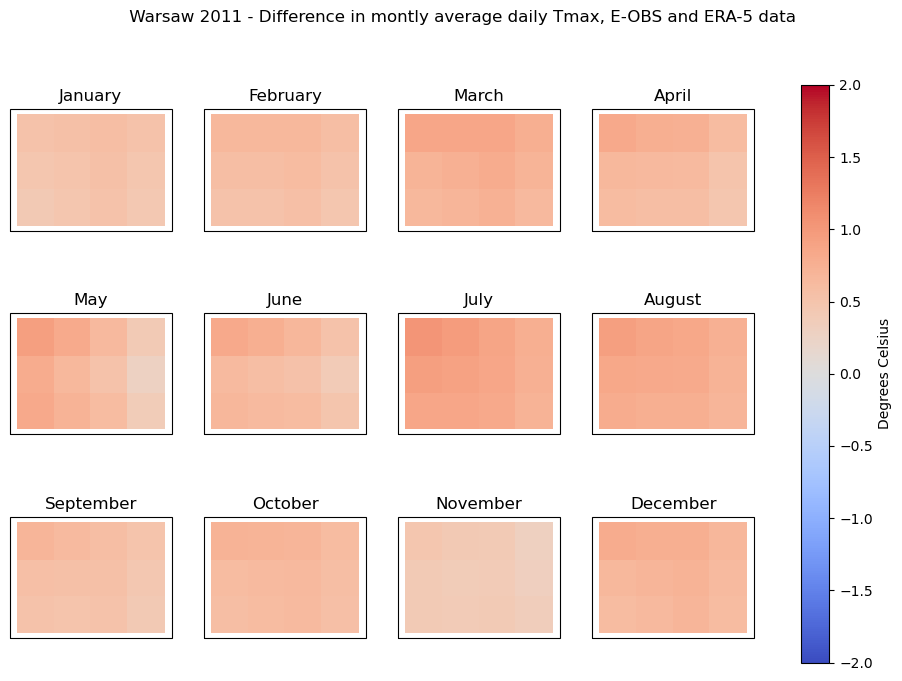

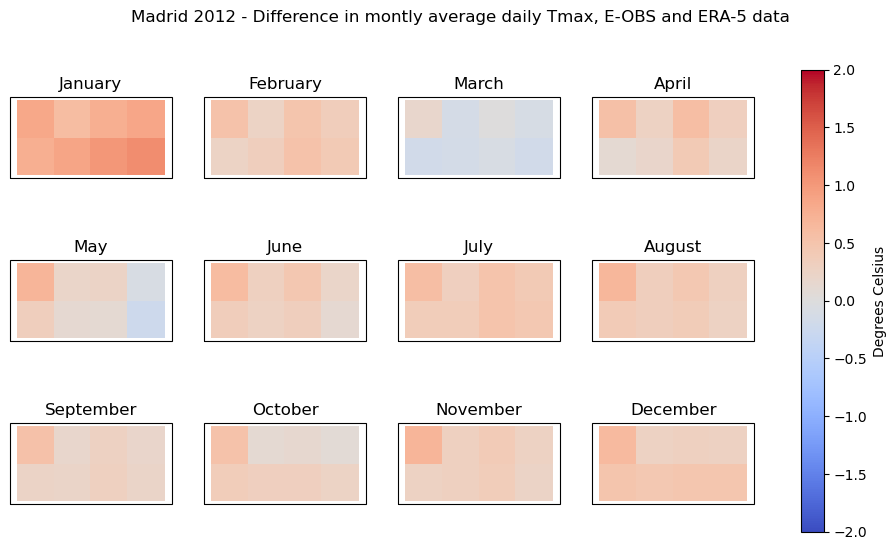

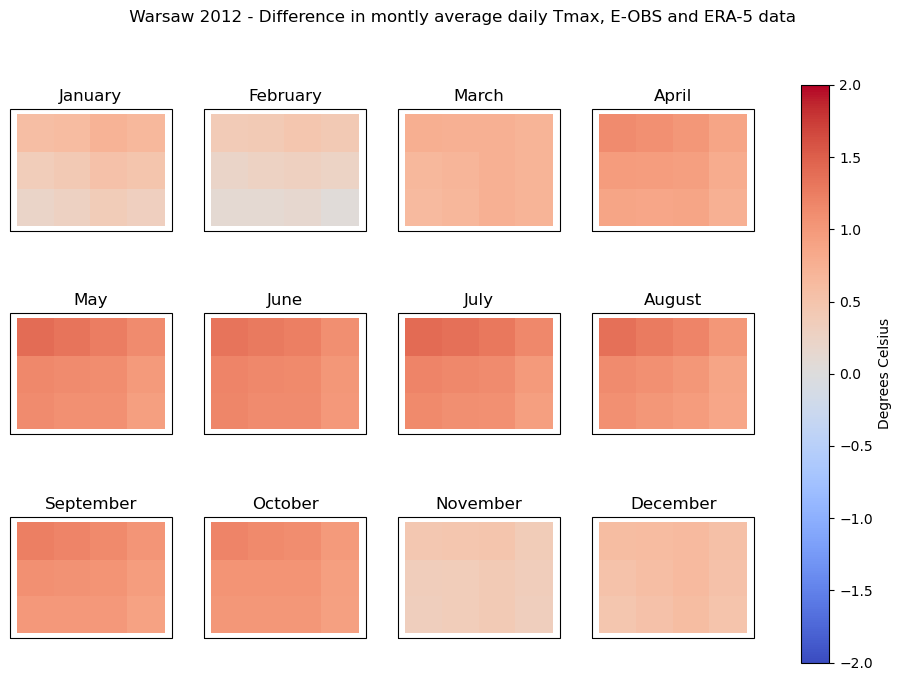

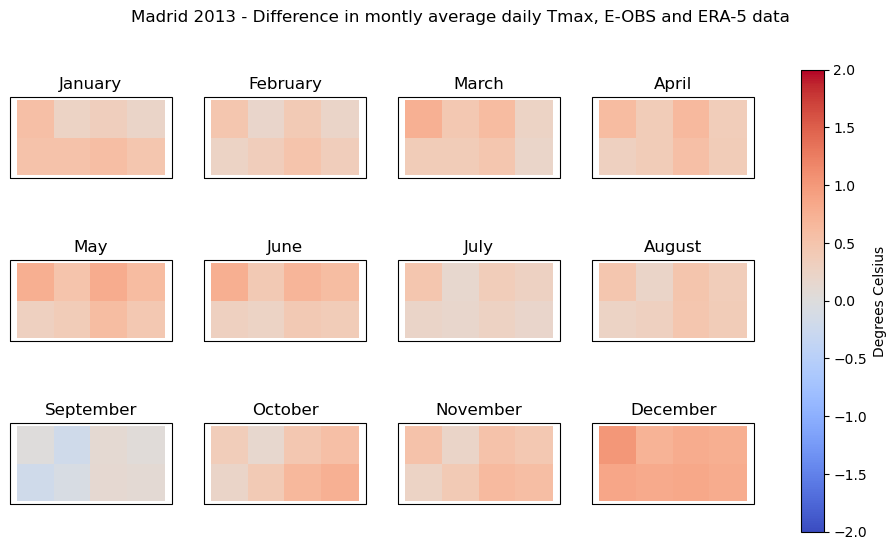

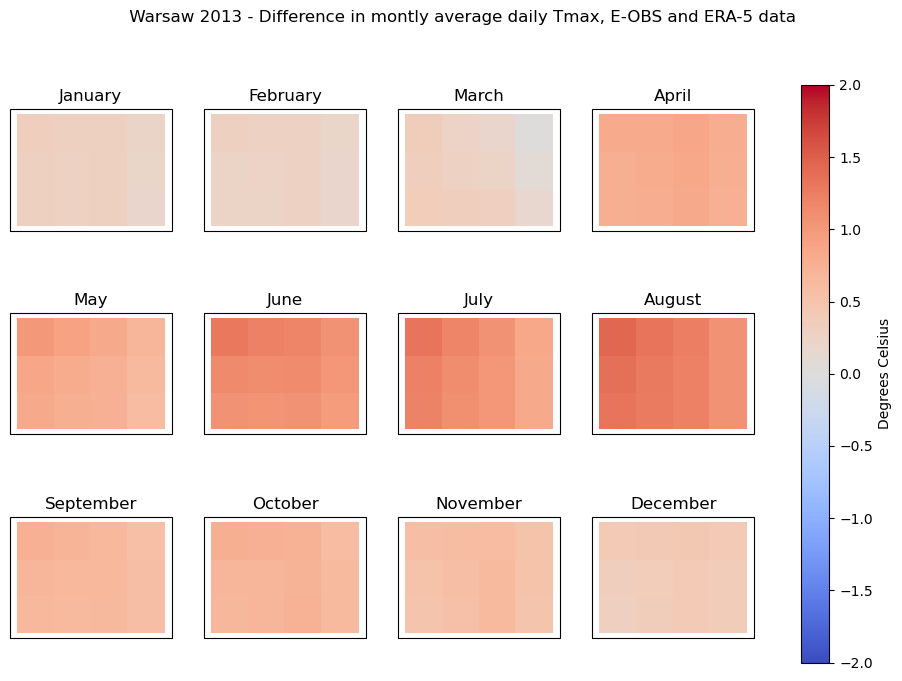

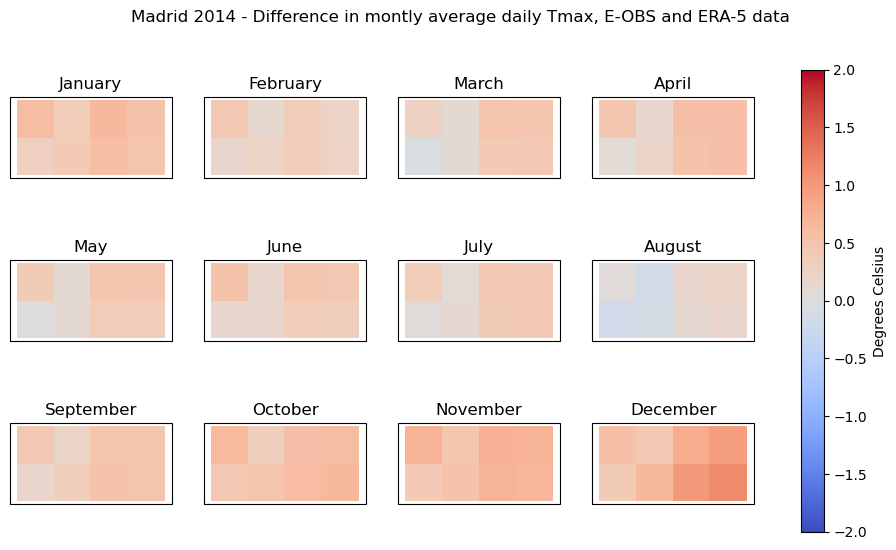

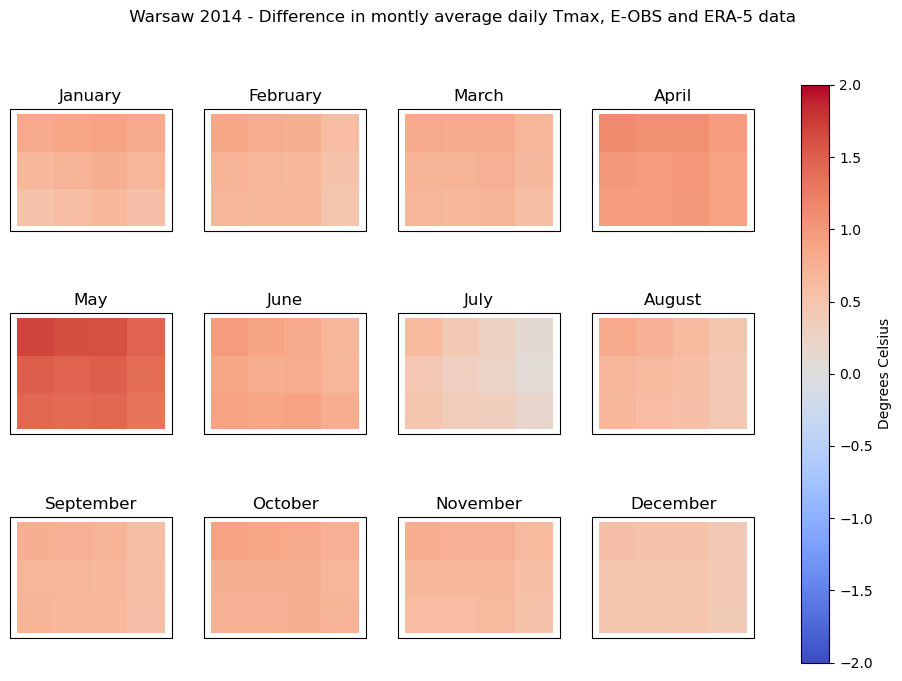

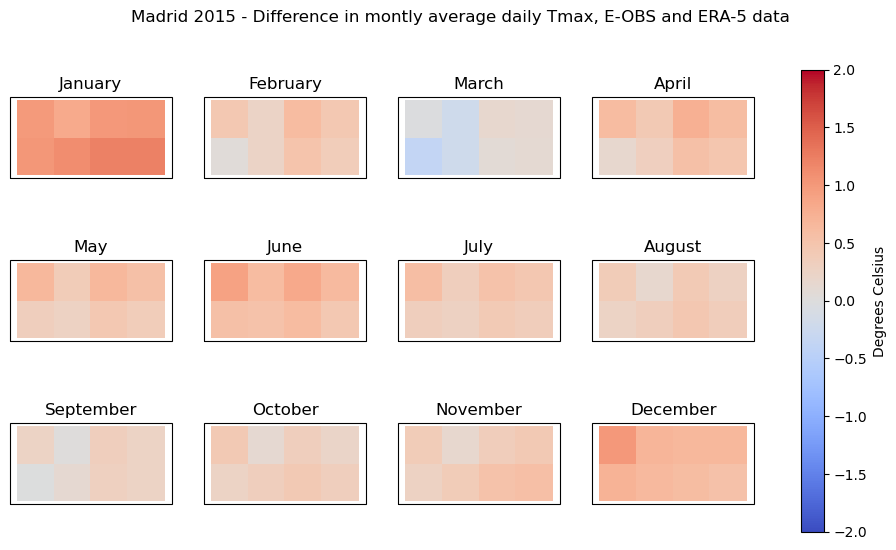

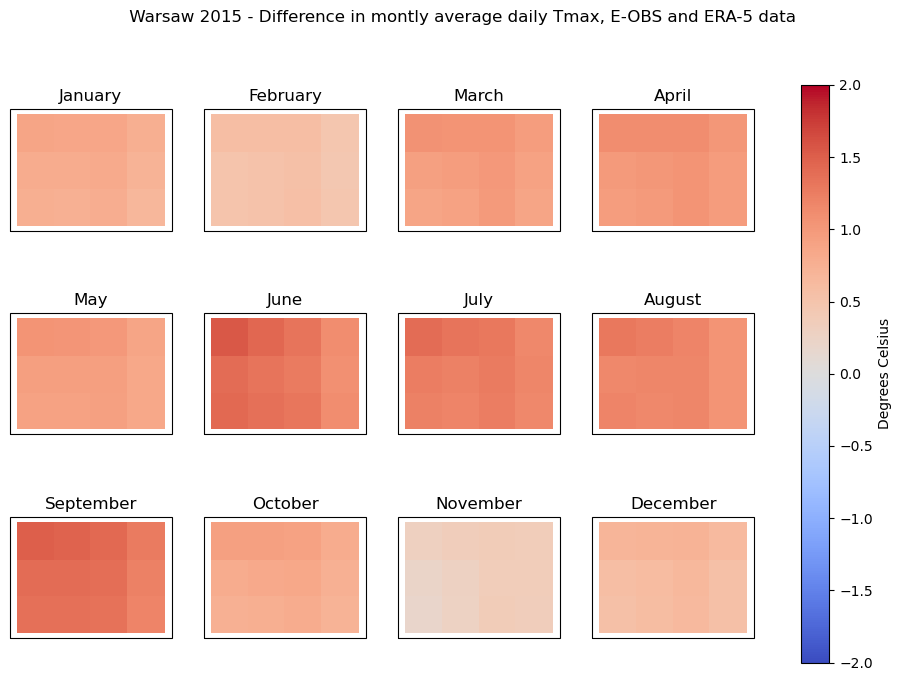

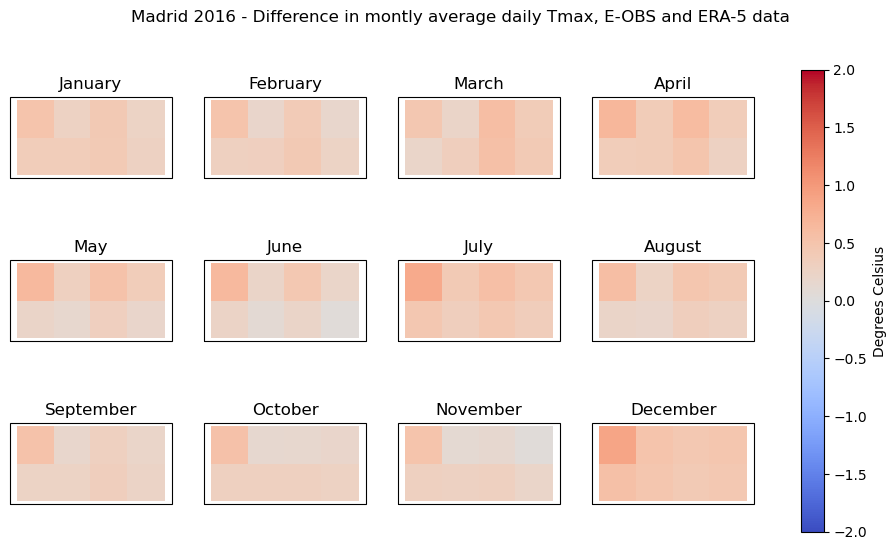

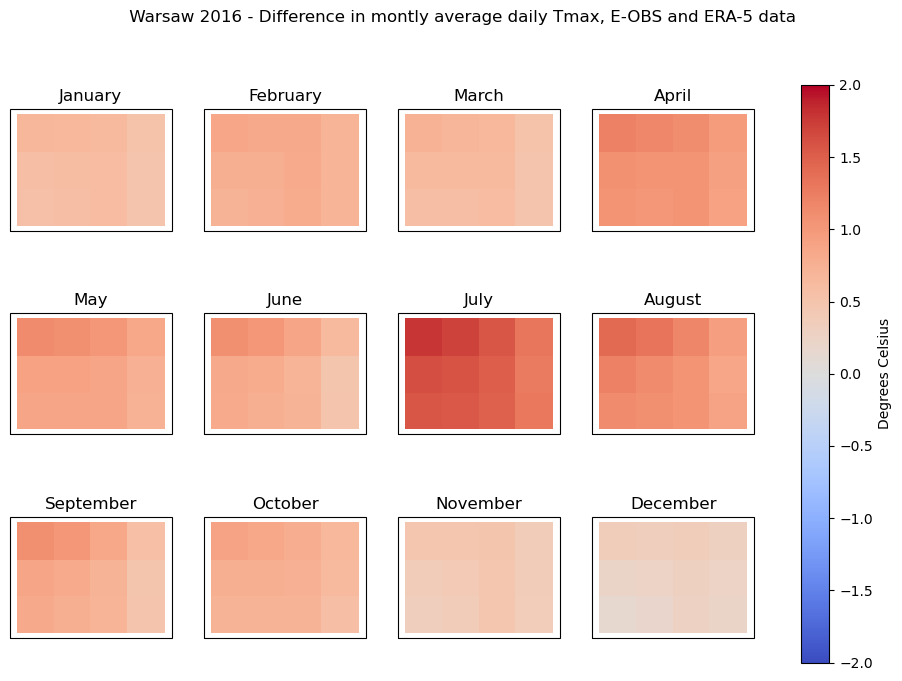

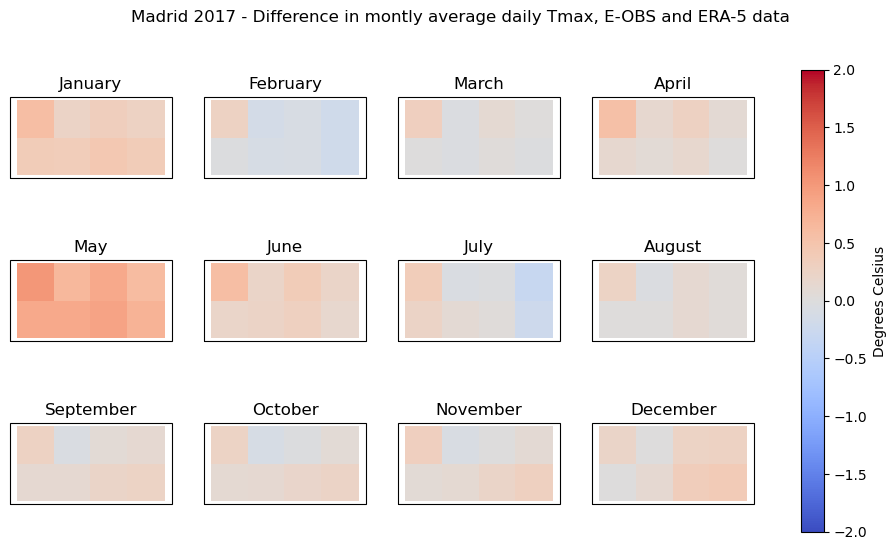

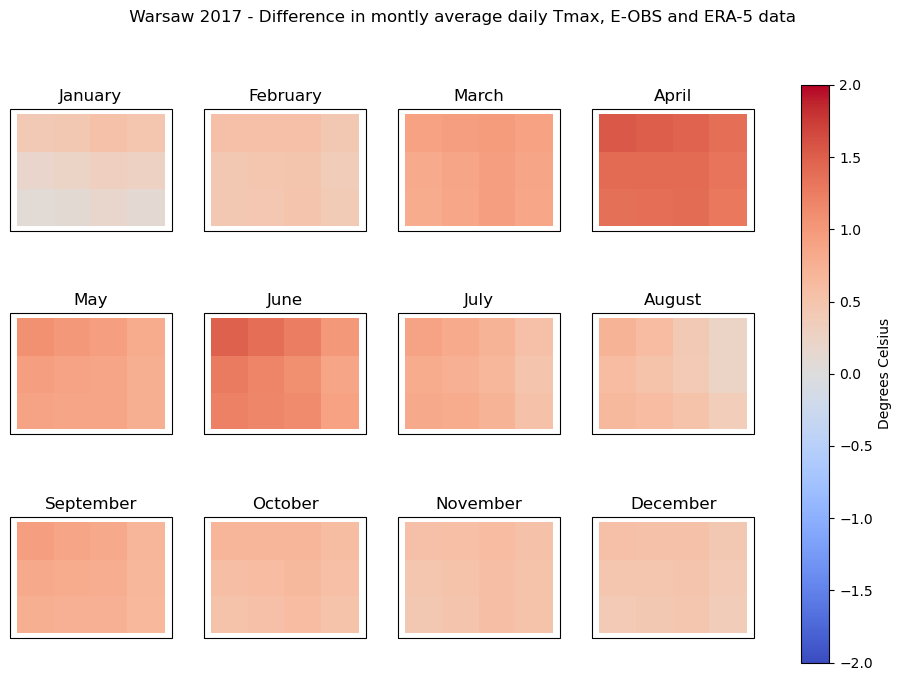

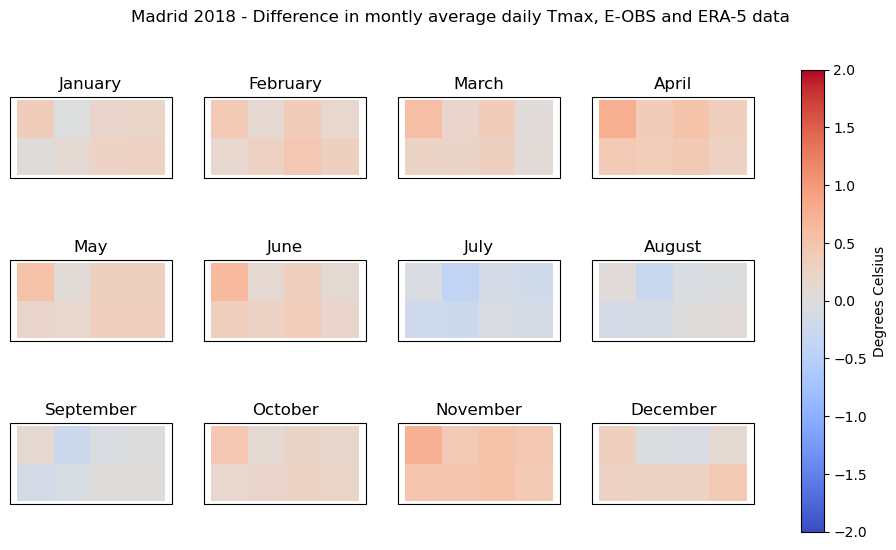

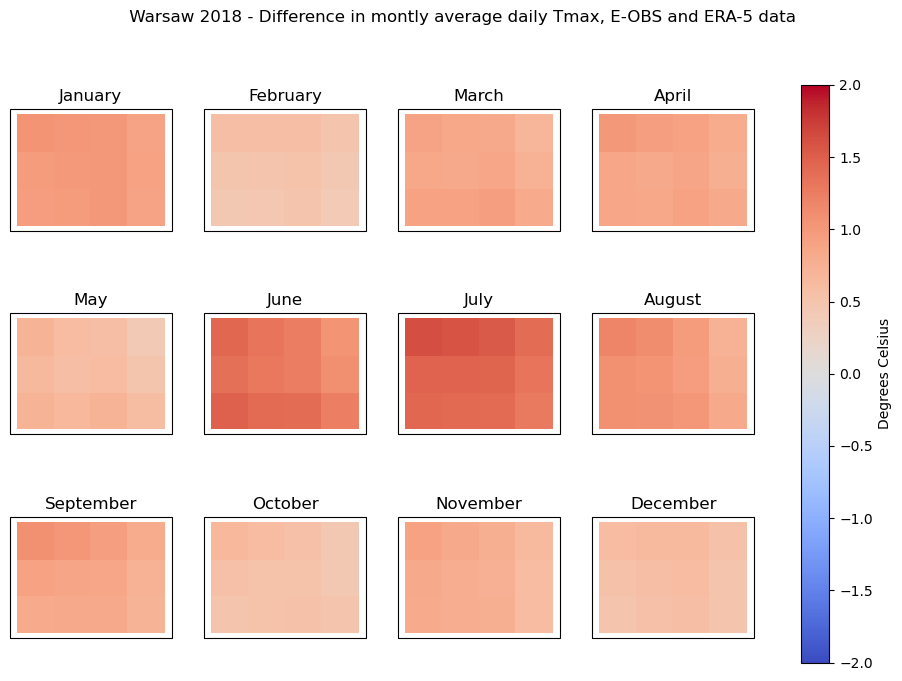

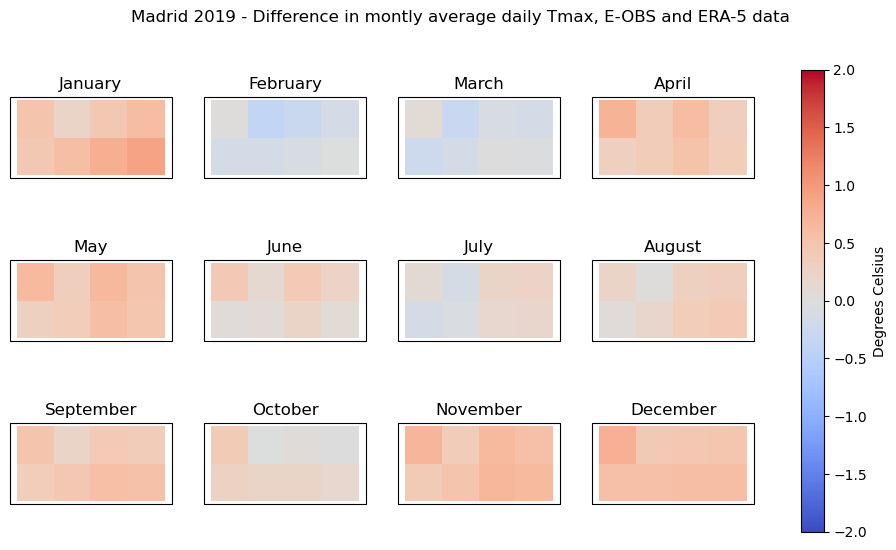

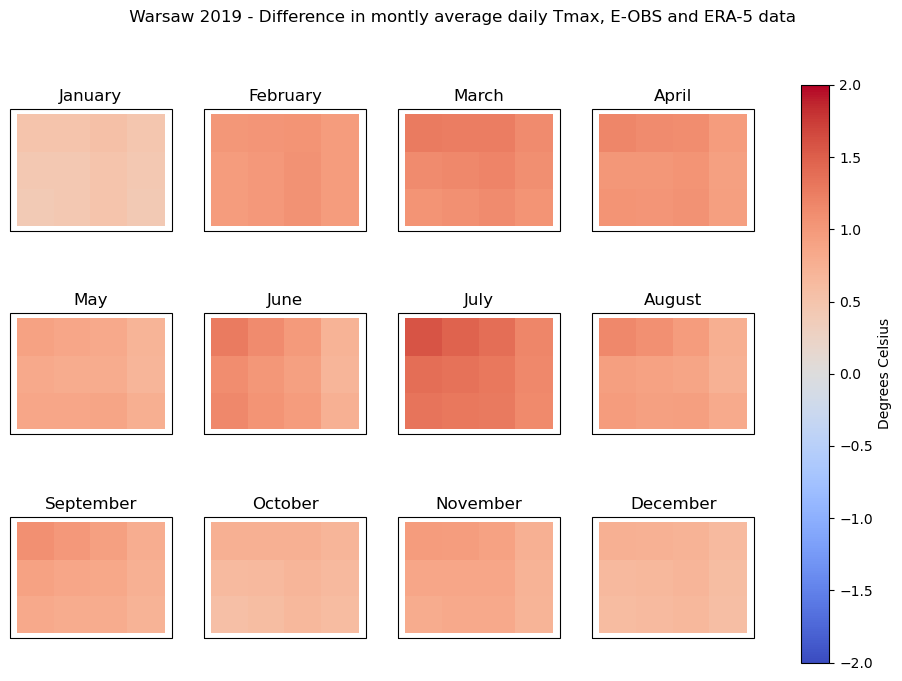

In [10]:
# list of years in time series
years = [str(year) for year in range(1990,2020)]
#years = ['1990']

# check if folder data/monavg_difference_gridwise exists, create it if not
if not os.path.isdir("data/monavg_difference_gridwise"):
    print("Making monavg_difference_gridwise")
    os.system("mkdir data/monavg_difference_gridwise")
else:
    print("Folder already exists")
    
# Produce one figure for each year
for year in years:
    
    # -- Madrid  --
    
    # initiate figure with 12 sublots, one for each month
    fig, axes = plt.subplots(nrows=3, ncols = 4, subplot_kw = {"projection" : ccrs.PlateCarree()}, figsize = (12,6))
    ds_one_year_madrid = ds_monavg_difference_madrid.sel(time = year)

    for i, ax in enumerate(axes.flat):
        one_month = ds_one_year_madrid.isel(time = i)["tx"].plot(
            ax = ax, transform = ccrs.PlateCarree(), add_colorbar = False, cmap = "coolwarm", vmin = -2, vmax = 2)
        ax.set_title(calendar.month_name[i+1])


    fig.colorbar(one_month, ax = axes[:,:], location = "right", label = "Degrees Celsius")
    fig.suptitle("Madrid {} - Difference in montly average daily Tmax, E-OBS and ERA-5 data".format(year))

    plt.savefig("data/monavg_difference_gridwise/{}_madrid.png".format(year))
    plt.show()

    # -- Warsaw  --
    
    # initiate figure with 12 sublots, one for each month
    fig, axes = plt.subplots(nrows=3, ncols = 4, subplot_kw = {"projection" : ccrs.PlateCarree()}, figsize = (12,7.5))
    ds_one_year_warsaw = ds_monavg_difference_warsaw.sel(time = year)

    for i, ax in enumerate(axes.flat):
        one_month = ds_one_year_warsaw.isel(time = i)["tx"].plot(
            ax = ax, transform = ccrs.PlateCarree(), add_colorbar = False, cmap = "coolwarm", vmin = -2, vmax = 2)
        ax.set_title(calendar.month_name[i+1])


    fig.colorbar(one_month, ax = axes[:,:], location = "right", label = "Degrees Celsius")
    fig.suptitle(" Warsaw {} - Difference in montly average daily Tmax, E-OBS and ERA-5 data".format(year))

    plt.savefig("data/monavg_difference_gridwise/{}_warsaw.png".format(year))
    plt.show()